In [1]:
import csv, re, random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [2]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

# Read Pickles

In [3]:
df_2010 = pd.read_pickle('df_2010P.pkl')

In [4]:
df_2011 = pd.read_pickle('df_2011P.pkl')

In [5]:
df_2012 = pd.read_pickle('df_2012P.pkl')

In [6]:
df_2013 = pd.read_pickle('df_2013P.pkl')

In [7]:
df_2014 = pd.read_pickle('df_2014P.pkl')

In [8]:
df_2015 = pd.read_pickle('df_2015P.pkl')

In [9]:
df_2016 = pd.read_pickle('df_2016P.pkl')

In [10]:
df_2017 = pd.read_pickle('df_2017P.pkl')

In [11]:
df_2018 = pd.read_pickle('df_2018P.pkl')

In [12]:
df_2019 = pd.read_pickle('df_2019P.pkl')

In [13]:
df_2020 = pd.read_pickle('df_2020P.pkl')

In [14]:
df_2020

,txtfiles_au_2020,txtfiles_bd_2020,txtfiles_ca_2020,txtfiles_gb_2020,txtfiles_gh_2020,txtfiles_hk_2020,txtfiles_ie_2020,txtfiles_in_2020,txtfiles_jm_2020,txtfiles_ke_2020,txtfiles_lk_2020,txtfiles_my_2020,txtfiles_ng_2020,txtfiles_nz_2020,txtfiles_ph_2020,txtfiles_pk_2020,txtfiles_sg_2020,txtfiles_tz_2020,txtfiles_us_2020,txtfiles_za_2020
0,[ we believe there have been many violations i...,[ though it is a big achievement for a policem...,"[ it's a scam , , why is appointment of a cds...",[ president trump is a threat to national secu...,[ you have to see how the standoff over trade ...,[ there is every potential that the we saw ( o...,"[ detained arbitrarily , crushed protests usi...","[ , i am sure under his leadership all the t...",[ papine has been an area that has been looked...,[ aircraft may encounter various anti-aircraft...,"[ , death to america , no , no america , th...","[ i think this club , in the last decade , was...",[ the divestment is part of shell's ongoing st...,[ they embrace the rescue helicopter and its c...,"[ she's always smiling and very professional ,...",[ the acumen of his foresight and vision can b...,"[ an embarrassing situation , an embarrassing...",[ rhinos are among the big five members who at...,"[ parasite , i think you could jump in on thi...",[ it's obviously gutting news for trent and al...
1,"[ trying to ruin his life , i felt like he wa...",[ days after criticising the government's agre...,[ topshee said the ship had recently complete...,[ mr stewart -- whose career in front of the ...,"[ , she told marilyn stasio in a 1997 interv...",[ it is ironic for both to the no 1 position h...,[ i did their oral practise with them because ...,[ fundamental right to personal liberty in a f...,"[ its role in public-sector transformation , ...",[ we will make sure that our people read and u...,[ we plead with the public to abstain from dis...,[ i its local characteristics and give it its ...,[ this accomplishment is a clear manifestation...,[ you can follow your own method on where you ...,"[ experience philippines , with the experienc...",[ i predict that president obama will at some ...,"[ alongside the rest of the world , we are rea...",[ they are allowed to do that when a vote is i...,[ inbreeding has always been high in thoroughb...,"[ mandatory retirement age , , our squad had ..."
2,[ people with chronic medical conditions of mo...,[ these are the skills you will learn when you...,[ the uk must also get its own house in order ...,"[ burned by broken promises again , china gen...","[ in january 2019 , steyer said he did not pl...","[ i am the way , the truth , and the life , f...",[ i have had no regard the incident as anythin...,"[ on the artificial intelligence front , i hav...",[ it prevents undervaluation of vehicle invoic...,[ upon presentation to the audit and risk comm...,[ oil prices are moving tangentially to news f...,"[ he is not the right prime minister , , the ...",[ proposal to the government on the problem of...,[ it should be a space in which freedom of nav...,"[ it's important to remember , , but the amer...",[ we understand that industrial sector can pla...,"[ possibly , investing in commercial property...",[ defectors will play no significant role in c...,"[ it was very hard on daniel , , i reached a ...",[ the nhi will ensure that we have sufficient ...
3,[ it's just soul destroying watching someone w...,[ with love from china to our frontline medica...,"[ eagerly welcome , there was no way we were ...",[ i would be lying if i said that we were not ...,[ the platform will provide real-time informat...,[ basically we've expanded our scope based on ...,[ i would like to congratulate shane kingston ...,"[ speaking on the occasion , chanda singh , c...",[ this will be adequate to meet normal demand ...,"[ , the entire world is shut down , , gentl...",[ currently these two patients are receiving t...,[ cfm advises all users to stay updated on the...,[ i believe that when all thes

# Concatenate 11 Years

In [15]:
# update columns name for 11 years, so each dataframe has the same name of columns
# the purpose of doing this is to prepare for concatenation in next step

countries = ['txtfiles_au','txtfiles_bd','txtfiles_ca','txtfiles_gb','txtfiles_gh','txtfiles_hk','txtfiles_ie',
             'txtfiles_in','txtfiles_jm','txtfiles_ke','txtfiles_lk','txtfiles_my','txtfiles_ng','txtfiles_nz',
             'txtfiles_ph','txtfiles_pk','txtfiles_sg','txtfiles_tz','txtfiles_us','txtfiles_za']

df_2010.columns = countries
df_2011.columns = countries
df_2012.columns = countries
df_2013.columns = countries
df_2014.columns = countries
df_2015.columns = countries
df_2016.columns = countries
df_2017.columns = countries
df_2018.columns = countries
df_2019.columns = countries
df_2020.columns = countries

In [16]:
# use pd.concat method to concate 11 years dataframe to make a bigger dateframe that consists of all articles

frames = [df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
df_2010to2020 = pd.concat(frames, ignore_index=True)
# ignore_index=Ture: do not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n - 1.

In [17]:
# 122 rows = 12 (2010) + 11 (2011) + 9 (2012) + 12 (2013) + 12 (2014) + 10 (2015) 
#            + 11 (2016) + 12 (2017) + 12 (2018) + 12 (2019) + 9 (2020)
df_2010to2020

,txtfiles_au,txtfiles_bd,txtfiles_ca,txtfiles_gb,txtfiles_gh,txtfiles_hk,txtfiles_ie,txtfiles_in,txtfiles_jm,txtfiles_ke,txtfiles_lk,txtfiles_my,txtfiles_ng,txtfiles_nz,txtfiles_ph,txtfiles_pk,txtfiles_sg,txtfiles_tz,txtfiles_us,txtfiles_za
0,[ we're warning particularly campers at this t...,[ your song about chorui pakhi ( dealing with ...,"[ , it's the best bang for the buck in town ...",[ labour has neglected the uk's obesity time-b...,"[ , fighting terrorism is a that we share sec...","[ advertisement still , , it's conceivable ...",[ insulated us from the worst of the excesses ...,[ tobacco is very attractive as a biofuel beca...,[ of that mysterious organ found between a wom...,"[ he is persona non grata here in kenya , , a...","[ when the ecosystem is protected , the small ...","[ a rm200,000 bail amounts to a punishment and...",[ we will be giving young people the rare oppo...,[ worth exploring if we are genuine about want...,"[ nobody's being kicked off their land , , bo...",[ this fundamental discovery advances our unde...,[ then we will face issues such as abortion an...,[],[ we are now translated into 48 languages and ...,[ the interest in both players is growing and ...
1,[ because of the side effects and because only...,[ i am confident that bangladesh's future lead...,"[ it was like ,' uh-oh , what am i doing here ...","[ fred's folly , goodwin may have made some b...",[ women consistently lag behind men in formal ...,[ raises a bigger question mark in china than ...,"[ i knew this guy was built like ,' rrruhhhr !...",[ higher castes resorting to social and econom...,[ going public is something i have always want...,[ they have hit us so we are hitting them back...,[ the hasty decision was taken by mulayam sing...,"[ bare your love , no panties during valentine...",[ : i have read some reports in the punch and ...,"[ convincing , they've all left st john now ,...",[ dinagyang is a unique and festive celebratio...,"[ water per litre in malaysia is cheap , compa...",[ she has to take a bus and then a train - it ...,[ we have received the green light : timm can ...,"[ , it created a firestorm , , the autism s...",[ hosting the ska will underscore africa's cap...
2,[ finally i think somebody in the big places i...,"[ digital bangladesh , now those who only nee...","[ these are staggering numbers , , that's one...","[ it is absurd , , a reform full of contradic...",[ these handicapped individuals recognized the...,"[ , dbs is in a superb position to build a d...",[ put it at the higher end of the scale but ac...,"[ it is a research agreement , , military lea...",[ the shortages of nurses will only continue t...,[ we are doing this translocation to restock a...,"[ i said , , former unp parliamentarian ravi ...",[ we are relieved because we have been fightin...,"[ south , because he did similar thing few ye...","[ most attacks are not of the' jaws' ilk , but...","[ i return with desire to succeed , , hey , y...","[ personally distressing , of course we are a...","[ we are not offering 3d as a niche product , ...",[],"[ a militant catholic church , they were lega...","[ said touchline media group publisher , desir..."
3,"[ why did he get lost ? , did he lose his way...",[ the forest officials too at least they are n...,[ i did feel that there's a need for an apolog...,"[ really have the face on , ooh she was livid ...",[ chief pathologist of the los angeles city mo...,"[ the airline's chairman , christopher pratt ...","[ every patient is different , which makes it ...","[ rates over and above the justified rate , a...",[ we literally have a killing field surroundin...,"[ you have to run under 2:10 , , most athlete...","[ would go a long way in making sri lankans , ...","[ over the past 18 years , we have witnessed c...","[ life changing , ranti omo enti e wo se , k...","[ long before , i don't think it was the ship...","[ , the track record of bayan muna , anakpaw...","[ positive role , eternal preparedness , afg...",[ 

# 300 Words for Each Country

In [18]:
# input: country_serie (for example: df_2010to2020.txtfiles_au).
# output: a list that consists of the most frequent 300 pairs (key: word + value: occurance times) for 2010to2020

def most300(country_serie):

    # create a dictionary. If key doesn't exist, set its value to be 0, otherwise its value + 1
    counts = dict()
    for article in country_serie:
        for quotes in article:
            words = quotes.lower().split()
            for word in words:
                counts[word] = counts.get(word, 0) + 1

    # pop all pairs in which keys are not words
    keys_to_remove = [',' , '?' , '.' , ';' , '!', ':', '-', '--', '(', ')', ",'"]
    for key in keys_to_remove:
        counts.pop(key, None)

    # use tuple to exchange key and value
    lst = list()
    for key, val in counts.items():
        newtup = (val, key)
        lst.append(newtup)

    # sort by value in pair and get the most 300
    # sortedLst contains tuples (val, key)
    sortedLst = sorted(lst, reverse=True)[:300]
    
    # exchange key and value back
    resLst = list()
    for val, key in sortedLst:
        newtup = (key, val)
        resLst.append(newtup)
    return resLst

count_au_2010to2020 = most300(df_2010to2020.txtfiles_au)
for key, val in count_au_2010to2020:
    print(key, val)

the 1172656
to 732449
and 650430
of 557585
a 521777
in 382616
that 323201
is 280440
we 256480
i 244641
it 226309
for 216844
have 169982
be 165201
are 160879
was 153841
on 148682
with 147637
this 142407
as 120642
not 111117
they 103746
at 101348
our 99061
you 96886
it's 93255
will 92510
but 92507
there 84775
has 82866
said 82669
people 81462
been 79659
from 76796
he 75872
an 75688
so 68684
their 68526
can 67582
all 67090
or 65334
about 65115
what 62718
had 59944
if 59870
by 59487
very 58397
more 57907
my 55944
would 55922
just 54834
do 52754
out 52028
when 50713
who 50045
were 49954
one 49908
think 49801
up 49421
get 47902
time 47095
going 45502
really 44728
like 44643
some 44620
because 42925
them 40759
which 39641
us 39308
no 39010
me 36295
his 35451
these 35195
don't 35138
good 33647
into 33244
lot 32174
we're 31540
see 31190
now 31095
than 30943
over 30396
years 30069
i'm 30013
new 29846
how 29656
any 29557
other 29551
know 29493
got 29384
want 29374
need 29046
those 28522
where 283

In [19]:
# calculate the most frequent 300 words for each country 2010to2020

count_bd_2010to2020 = most300(df_2010to2020.txtfiles_bd)
count_ca_2010to2020 = most300(df_2010to2020.txtfiles_ca)
count_gb_2010to2020 = most300(df_2010to2020.txtfiles_gb)
count_gh_2010to2020 = most300(df_2010to2020.txtfiles_gh)
count_hk_2010to2020 = most300(df_2010to2020.txtfiles_hk)
count_ie_2010to2020 = most300(df_2010to2020.txtfiles_ie)
count_in_2010to2020 = most300(df_2010to2020.txtfiles_in)
count_jm_2010to2020 = most300(df_2010to2020.txtfiles_jm)
count_ke_2010to2020 = most300(df_2010to2020.txtfiles_ke)
count_lk_2010to2020 = most300(df_2010to2020.txtfiles_lk)
count_my_2010to2020 = most300(df_2010to2020.txtfiles_my)
count_ng_2010to2020 = most300(df_2010to2020.txtfiles_ng)
count_nz_2010to2020 = most300(df_2010to2020.txtfiles_nz)
count_ph_2010to2020 = most300(df_2010to2020.txtfiles_ph)
count_pk_2010to2020 = most300(df_2010to2020.txtfiles_pk)
count_sg_2010to2020 = most300(df_2010to2020.txtfiles_sg)
count_tz_2010to2020 = most300(df_2010to2020.txtfiles_tz)
count_us_2010to2020 = most300(df_2010to2020.txtfiles_us)
count_za_2010to2020 = most300(df_2010to2020.txtfiles_za)

# Union Words

In [20]:
df_2010to2020_words = pd.DataFrame()

In [21]:
countries = ['count_au_2010to2020', 'count_bd_2010to2020', 'count_ca_2010to2020', 'count_gb_2010to2020', 'count_gh_2010to2020', 'count_hk_2010to2020', 'count_ie_2010to2020', 'count_in_2010to2020', 'count_jm_2010to2020', 'count_ke_2010to2020', 'count_lk_2010to2020','count_my_2010to2020', 'count_ng_2010to2020', 'count_nz_2010to2020', 'count_ph_2010to2020', 'count_pk_2010to2020', 'count_sg_2010to2020', 'count_tz_2010to2020', 'count_us_2010to2020', 'count_za_2010to2020']

In [22]:
df_2010to2020_words.insert(loc=0, column='Countries', value=countries)

In [23]:
df_2010to2020_words

,Countries
0,count_au_2010to2020
1,count_bd_2010to2020
2,count_ca_2010to2020
3,count_gb_2010to2020
4,count_gh_2010to2020
5,count_hk_2010to2020
6,count_ie_2010to2020
7,count_in_2010to2020
8,count_jm_2010to2020
9,count_ke_2010to2020


In [24]:
# union 300 words from each country, so the new dataframe consist of all occurant word
# it should have 300 (if each country has identicle 300 words) - 6000 words (if each country has distinct 300 words)
# for example function union_words (df1, count_au_2010to2020) union words in list count_au_2010to2020 with dataframe 1
# and then expands the columns.
# output: new dateframe

def union_words(df, new_lst):
    key_lst = []
    for key, val in new_lst:
        key_lst.append(key)
    df = df.reindex(df.columns.union(key_lst, sort=False), axis=1, fill_value=0)
    return df

df_2010to2020_words = union_words(df_2010to2020_words, count_au_2010to2020)

In [25]:
# already union the first 300 words from list count_au_2010to2020, so we have 301 columns now

df_2010to2020_words

,Countries,the,to,and,of,a,in,that,is,we,...,came,everything,person,issue,case,ensure,anything,including,playing,certainly
0,count_au_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,count_bd_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,count_ca_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,count_gb_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,count_gh_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,count_hk_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,count_ie_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,count_in_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,count_jm_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,count_ke_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# union with rest 19 lists

df_2010to2020_words = union_words(df_2010to2020_words, count_bd_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ca_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gb_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gh_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_hk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ie_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_in_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_jm_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ke_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_lk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_my_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ng_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_nz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ph_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_pk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_sg_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_tz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_us_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_za_2010to2020)

In [27]:
# already union all words from 20 countries
# now we have 660 distinct words, so it shows 661 columns

df_2010to2020_words

,Countries,the,to,and,of,a,in,that,is,we,...,reach,tell,safety,covid-19,knew,safe,felt,nothing,anc,cape
0,count_au_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,count_bd_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,count_ca_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,count_gb_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,count_gh_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,count_hk_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,count_ie_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,count_in_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,count_jm_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,count_ke_2010to2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_2010to2020_words = df_2010to2020_words.set_index('Countries')

In [29]:
df_2010to2020_words = df_2010to2020_words.sort_index(axis=1)

In [30]:
df_2010to2020_words

,2019,a,able,about,absolutely,access,across,act,action,activities,...,would,year,years,yet,you,you're,young,your,youth,zealand
Countries,,,,,,,,,,,,,,,,,,,,,
count_au_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_bd_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_ca_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_gb_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_gh_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_hk_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_ie_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_in_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count_jm_2010to2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fill in Word Frenquency

In [31]:
# function fills in the word frenquency to the dataframe. 
# For example, "you" appears 96886 times in count_au_2010to2020, then fill in 96886.

def fill_in(df, new_lst, row):
    for key, val in new_lst:
        if key in df.iloc[row]:
            df[key].iloc[row] = val

In [32]:
# use function to fill in all 660 words

fill_in(df_2010to2020_words, count_au_2010to2020, 0)
fill_in(df_2010to2020_words, count_bd_2010to2020, 1)
fill_in(df_2010to2020_words, count_ca_2010to2020, 2)
fill_in(df_2010to2020_words, count_gb_2010to2020, 3)
fill_in(df_2010to2020_words, count_gh_2010to2020, 4)
fill_in(df_2010to2020_words, count_hk_2010to2020, 5)
fill_in(df_2010to2020_words, count_ie_2010to2020, 6)
fill_in(df_2010to2020_words, count_in_2010to2020, 7)
fill_in(df_2010to2020_words, count_jm_2010to2020, 8)
fill_in(df_2010to2020_words, count_ke_2010to2020, 9)
fill_in(df_2010to2020_words, count_lk_2010to2020, 10)
fill_in(df_2010to2020_words, count_my_2010to2020, 11)
fill_in(df_2010to2020_words, count_ng_2010to2020, 12)
fill_in(df_2010to2020_words, count_nz_2010to2020, 13)
fill_in(df_2010to2020_words, count_ph_2010to2020, 14)
fill_in(df_2010to2020_words, count_pk_2010to2020, 15)
fill_in(df_2010to2020_words, count_sg_2010to2020, 16)
fill_in(df_2010to2020_words, count_tz_2010to2020, 17)
fill_in(df_2010to2020_words, count_us_2010to2020, 18)
fill_in(df_2010to2020_words, count_za_2010to2020, 19)

In [33]:
# from each year version, occurance times of word "you" for country au
# = 1152 (2010) + 1200 (2011) + 1385 (2012) + 3183 (2013) + 4474 (2014) + 4844 (2015) 
#   + 15629 (2016) + 19462 (2017) + 17162 (2018) + 15649 (2019) + 12746 (2020) = 96886 (correct)

df_2010to2020_words
data9 = df_2010to2020_words.copy()

# Convert to Ratio

In [34]:
df_2010to2020_words['Sum'] = df_2010to2020_words.sum(axis=1)

In [35]:
df_2010to2020_words

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Sum
Countries,,,,,,,,,,,,,,,,,,,,,
count_au_2010to2020,0,521777,16266,65115,0,0,11136,0,0,0,...,28172,30069,0,96886,10706,10264,21371,0,0,13611183
count_bd_2010to2020,0,25230,866,3143,0,0,0,0,562,0,...,1245,1412,487,3573,0,0,841,0,0,806614
count_ca_2010to2020,0,803710,26411,97970,0,0,12716,0,0,0,...,43998,44945,0,170671,23262,12491,33776,0,0,20792526
count_gb_2010to2020,0,378176,7989,43362,0,0,6290,0,0,0,...,15387,18918,0,61289,0,7114,11923,0,0,9554837
count_gh_2010to2020,0,39373,1464,4834,0,0,0,839,0,0,...,1990,2391,0,10193,0,811,2423,0,0,1372524
count_hk_2010to2020,0,14956,388,1601,0,0,303,0,0,0,...,746,982,0,2174,0,0,443,0,0,447034
count_ie_2010to2020,0,261543,5269,27536,4268,0,5272,0,0,0,...,14454,15439,0,40085,0,5222,8359,0,0,6834106
count_in_2010to2020,0,315855,8025,35387,0,0,7923,10099,9929,0,...,16776,20142,0,35822,0,0,8725,0,0,10482363
count_jm_2010to2020,0,21236,884,2008,0,376,433,0,0,0,...,1255,1212,0,5263,0,582,1154,0,0,681099


In [36]:
df_2010to2020_words_percent = df_2010to2020_words.loc[:].div(df_2010to2020_words["Sum"], axis=0)

In [37]:
df_2010to2020_words_percent

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Sum
Countries,,,,,,,,,,,,,,,,,,,,,
count_au_2010to2020,0.000000,0.038334,0.001195,0.004784,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,...,0.002070,0.002209,0.000000,0.007118,0.000787,0.000754,0.001570,0.000000,0.000000,1.0
count_bd_2010to2020,0.000000,0.031279,0.001074,0.003897,0.000000,0.000000,0.000000,0.000000,0.000697,0.000000,...,0.001543,0.001751,0.000604,0.004430,0.000000,0.000000,0.001043,0.000000,0.000000,1.0
count_ca_2010to2020,0.000000,0.038654,0.001270,0.004712,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,...,0.002116,0.002162,0.000000,0.008208,0.001119,0.000601,0.001624,0.000000,0.000000,1.0
count_gb_2010to2020,0.000000,0.039580,0.000836,0.004538,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000,...,0.001610,0.001980,0.000000,0.006414,0.000000,0.000745,0.001248,0.000000,0.000000,1.0
count_gh_2010to2020,0.000000,0.028687,0.001067,0.003522,0.000000,0.000000,0.000000,0.000611,0.000000,0.000000,...,0.001450,0.001742,0.000000,0.007426,0.000000,0.000591,0.001765,0.000000,0.000000,1.0
count_hk_2010to2020,0.000000,0.033456,0.000868,0.003581,0.000000,0.000000,0.000678,0.000000,0.000000,0.000000,...,0.001669,0.002197,0.000000,0.004863,0.000000,0.000000,0.000991,0.000000,0.000000,1.0
count_ie_2010to2020,0.000000,0.038270,0.000771,0.004029,0.000625,0.000000,0.000771,0.000000,0.000000,0.000000,...,0.002115,0.002259,0.000000,0.005865,0.000000,0.000764,0.001223,0.000000,0.000000,1.0
count_in_2010to2020,0.000000,0.030132,0.000766,0.003376,0.000000,0.000000,0.000756,0.000963,0.000947,0.000000,...,0.001600,0.001922,0.000000,0.003417,0.000000,0.000000,0.000832,0.000000,0.000000,1.0
count_jm_2010to2020,0.000000,0.031179,0.001298,0.002948,0.000000,0.000552,0.000636,0.000000,0.000000,0.000000,...,0.001843,0.001779,0.000000,0.007727,0.000000,0.000855,0.001694,0.000000,0.000000,1.0


# Add Peace as A Feature

In [38]:
df_2010to2020_peace = df_2010to2020_words_percent

In [39]:
df_2010to2020_peace.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']

In [40]:
# df_2010_peace['words'] = counts_au_2010, counts_bd_2010, counts_ca_2010, counts_gb_2010, counts_gh_2010, counts_hk_2010, counts_ie_2010, counts_in_2010, counts_jm_2010, counts_ke_2010, counts_lk_2010,counts_my_2010, counts_ng_2010, counts_nz_2010, counts_ph_2010, counts_pk_2010, counts_sg_2010, counts_tz_2010, counts_us_2010, counts_za_2010
# df_2010_peace.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']

In [41]:
df_2010to2020_peace

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Sum
Australia AU,0.000000,0.038334,0.001195,0.004784,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,...,0.002070,0.002209,0.000000,0.007118,0.000787,0.000754,0.001570,0.000000,0.000000,1.0
Bangladesh BD,0.000000,0.031279,0.001074,0.003897,0.000000,0.000000,0.000000,0.000000,0.000697,0.000000,...,0.001543,0.001751,0.000604,0.004430,0.000000,0.000000,0.001043,0.000000,0.000000,1.0
Canada CA,0.000000,0.038654,0.001270,0.004712,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,...,0.002116,0.002162,0.000000,0.008208,0.001119,0.000601,0.001624,0.000000,0.000000,1.0
United Kingdom GB,0.000000,0.039580,0.000836,0.004538,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000,...,0.001610,0.001980,0.000000,0.006414,0.000000,0.000745,0.001248,0.000000,0.000000,1.0
Ghana GH,0.000000,0.028687,0.001067,0.003522,0.000000,0.000000,0.000000,0.000611,0.000000,0.000000,...,0.001450,0.001742,0.000000,0.007426,0.000000,0.000591,0.001765,0.000000,0.000000,1.0
Hong Kong HK,0.000000,0.033456,0.000868,0.003581,0.000000,0.000000,0.000678,0.000000,0.000000,0.000000,...,0.001669,0.002197,0.000000,0.004863,0.000000,0.000000,0.000991,0.000000,0.000000,1.0
Ireland IE,0.000000,0.038270,0.000771,0.004029,0.000625,0.000000,0.000771,0.000000,0.000000,0.000000,...,0.002115,0.002259,0.000000,0.005865,0.000000,0.000764,0.001223,0.000000,0.000000,1.0
India IN,0.000000,0.030132,0.000766,0.003376,0.000000,0.000000,0.000756,0.000963,0.000947,0.000000,...,0.001600,0.001922,0.000000,0.003417,0.000000,0.000000,0.000832,0.000000,0.000000,1.0
Jamaica JM,0.000000,0.031179,0.001298,0.002948,0.000000,0.000552,0.000636,0.000000,0.000000,0.000000,...,0.001843,0.001779,0.000000,0.007727,0.000000,0.000855,0.001694,0.000000,0.000000,1.0
Kenya KE,0.000000,0.026791,0.000856,0.002271,0.000000,0.000639,0.000600,0.000672,0.000000,0.000000,...,0.001488,0.001417,0.000757,0.005145,0.000000,0.000000,0.001140,0.000000,0.000000,1.0


In [42]:
# insert a new column "Group" (0, 1, 2)
# 0: false --> not peaceful
# 1: true --> peaceful
# 2: neutral

df_2010to2020_peace['Group'] = [1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2]

def numbers_to_strings(argument):
    switcher = {
        0: "Not Peaceful",
        1: "Peaceful",
        2: "Neutral",
    }
    
    return switcher.get(argument, "None")

In [43]:
# insert a new column "Group Name" (Peaceful, Not Peaceful, Neutral)

group_name = []
for i in df_2010to2020_peace['Group']:
    group_name.append(numbers_to_strings(i))
    
df_2010to2020_peace['Group Name'] = group_name

In [44]:
df_2010to2020_peace

,2019,a,able,about,absolutely,access,across,act,action,activities,...,yet,you,you're,young,your,youth,zealand,Sum,Group,Group Name
Australia AU,0.000000,0.038334,0.001195,0.004784,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,...,0.000000,0.007118,0.000787,0.000754,0.001570,0.000000,0.000000,1.0,1,Peaceful
Bangladesh BD,0.000000,0.031279,0.001074,0.003897,0.000000,0.000000,0.000000,0.000000,0.000697,0.000000,...,0.000604,0.004430,0.000000,0.000000,0.001043,0.000000,0.000000,1.0,0,Not Peaceful
Canada CA,0.000000,0.038654,0.001270,0.004712,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,...,0.000000,0.008208,0.001119,0.000601,0.001624,0.000000,0.000000,1.0,1,Peaceful
United Kingdom GB,0.000000,0.039580,0.000836,0.004538,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000,...,0.000000,0.006414,0.000000,0.000745,0.001248,0.000000,0.000000,1.0,1,Peaceful
Ghana GH,0.000000,0.028687,0.001067,0.003522,0.000000,0.000000,0.000000,0.000611,0.000000,0.000000,...,0.000000,0.007426,0.000000,0.000591,0.001765,0.000000,0.000000,1.0,2,Neutral
Hong Kong HK,0.000000,0.033456,0.000868,0.003581,0.000000,0.000000,0.000678,0.000000,0.000000,0.000000,...,0.000000,0.004863,0.000000,0.000000,0.000991,0.000000,0.000000,1.0,2,Neutral
Ireland IE,0.000000,0.038270,0.000771,0.004029,0.000625,0.000000,0.000771,0.000000,0.000000,0.000000,...,0.000000,0.005865,0.000000,0.000764,0.001223,0.000000,0.000000,1.0,1,Peaceful
India IN,0.000000,0.030132,0.000766,0.003376,0.000000,0.000000,0.000756,0.000963,0.000947,0.000000,...,0.000000,0.003417,0.000000,0.000000,0.000832,0.000000,0.000000,1.0,2,Neutral
Jamaica JM,0.000000,0.031179,0.001298,0.002948,0.000000,0.000552,0.000636,0.000000,0.000000,0.000000,...,0.000000,0.007727,0.000000,0.000855,0.001694,0.000000,0.000000,1.0,2,Neutral
Kenya KE,0.000000,0.026791,0.000856,0.002271,0.000000,0.000639,0.000600,0.000672,0.000000,0.000000,...,0.000757,0.005145,0.000000,0.000000,0.001140,0.000000,0.000000,1.0,0,Not Peaceful


# Traditional Method to Predict

In [45]:
# # traditional method to predict

# X = df_2010to2020_peace.drop(['Sum', 'Group', 'Group Name'], axis=1)
# y = df_2010to2020_peace['Group']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, n_jobs=2)
# forest.fit(X_train,y_train)

# # compute predictions
# preds=forest.predict(X_test)

# # produce simple confusion matrix
# matrix=pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'], dropna=False)
# print('\nPrediction Matrix\n \n',matrix)

# # produce pretty confusion matrx
# cnf_matrix = metrics.confusion_matrix(y_test, preds)
# class_names=[0,1,2] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# # plt.tight_layout()  #why this? just cuts off labels!
# # plt.title('Confusion matrix', y=1.1)
# plt.title('Confusion matrix')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.show(block=False)

# # produce analysis report
# print("Report:\n",classification_report(y_test, preds))
# print("Accuracy:",accuracy_score(y_test, preds))

# New Method: Use 19 to Predict 1

In [46]:
# data consists of X_train, X_test, y_train, y_test
# use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array

data = df_2010to2020_peace.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data).to_numpy()
rows,cols=adata.shape

In [47]:
adata
print("rows:", rows)
print("cols:", cols)

rows: 20
cols: 661


In [48]:
#remove row i, train all else, test i
predict=np.zeros((rows))
for m in range(rows):
    # np.delete(data, index, axis)
    adatam1=np.delete(adata, m, 0)
    X_train=np.delete(adatam1, cols-1, 1)
    y_train=adatam1[:,cols-1]
    print('\nm =',m)
    #Random Forest classifier
    #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
    test_forest1 = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
    test_forest1.fit(X_train, y_train)
    X_test=adata[m,0:cols-1]
    X_test=X_test.reshape(1, -1)
    predict[m]=test_forest1.predict(X_test)


m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19


In [49]:
# create a dataframe to display actual results and predicted results

df_actu_pred = pd.DataFrame({
    'Actual': df_2010to2020_peace['Group'],
    'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                  predict[8], predict[9], predict[10], predict[11], predict[12], predict[13], predict[14], predict[15], 
                  predict[16], predict[17], predict[18], predict[19]]
})

df_actu_pred.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']

In [50]:
df_actu_pred

,Actual,Predicted
Australia AU,1,1.0
Bangladesh BD,0,2.0
Canada CA,1,1.0
United Kingdom GB,1,1.0
Ghana GH,2,0.0
Hong Kong HK,2,1.0
Ireland IE,1,1.0
India IN,2,0.0
Jamaica JM,2,2.0
Kenya KE,0,2.0


# Confusion Matrix with Report

[[1 0 4]
 [0 5 1]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          3    2    4


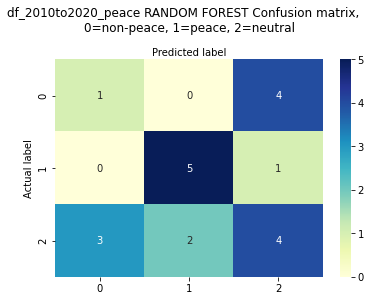

In [51]:
y_test=y_train=adata[:,cols-1]
y_pred=predict

# adding simple confusion matrix
print(confusion_matrix(y_test, y_pred))

matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
print('\nPrediction Matrix\n \n',matrix)

# adding pretty confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace, 2=neutral', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [52]:
# Report
print("Report:\n",classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5


In [53]:
data0 = df_2010to2020_peace.copy()
data0 = data0.drop(['Sum', 'Group Name'], axis=1)
adata = pd.DataFrame(data0).to_numpy()
rows,cols=adata.shape

In [54]:
adata
print("rows:", rows)
print("cols:", cols)

rows: 20
cols: 661



m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 4 2]
 [4 1 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    4    2
2.0          4    1    4


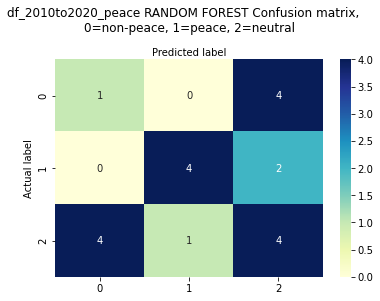

Report:
               precision    recall  f1-score   support

         0.0       0.20      0.20      0.20         5
         1.0       0.80      0.67      0.73         6
         2.0       0.40      0.44      0.42         9

    accuracy                           0.45        20
   macro avg       0.47      0.44      0.45        20
weighted avg       0.47      0.45      0.46        20

Accuracy: 0.45

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 4 2]
 [2 1 6]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    4    2
2.0          2    1    6


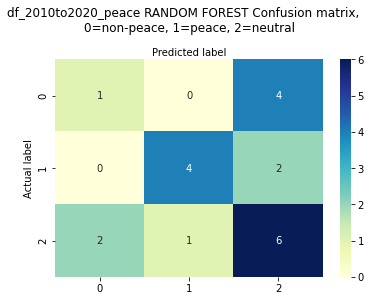

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.80      0.67      0.73         6
         2.0       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.54      0.51      0.52        20
weighted avg       0.55      0.55      0.54        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 3 3]
 [2 1 6]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    3    3
2.0          2    1    6


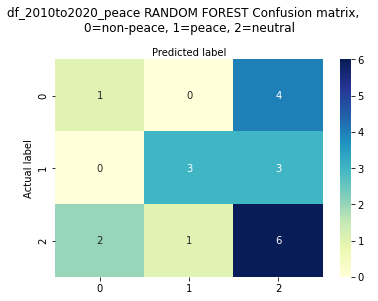

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.75      0.50      0.60         6
         2.0       0.46      0.67      0.55         9

    accuracy                           0.50        20
   macro avg       0.51      0.46      0.47        20
weighted avg       0.52      0.50      0.49        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [2 2 5]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          2    2    5


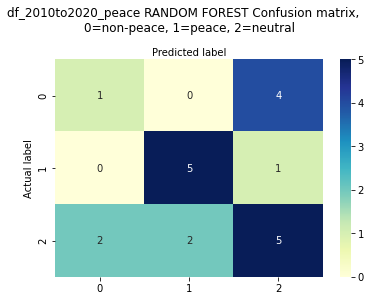

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.71      0.83      0.77         6
         2.0       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.52      0.53      0.52        20
weighted avg       0.52      0.55      0.53        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [3 3 3]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          3    3    3


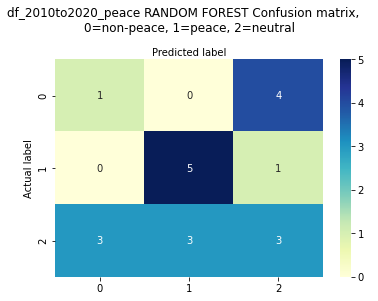

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.62      0.83      0.71         6
         2.0       0.38      0.33      0.35         9

    accuracy                           0.45        20
   macro avg       0.42      0.46      0.43        20
weighted avg       0.42      0.45      0.43        20

Accuracy: 0.45

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 4 2]
 [1 2 6]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    4    2
2.0          1    2    6


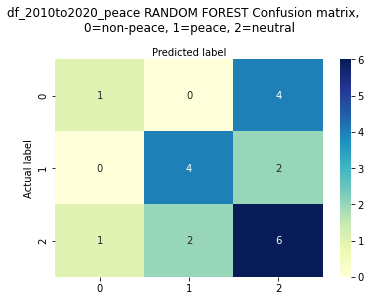

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.67      0.67      0.67         6
         2.0       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.51      0.51        20
weighted avg       0.55      0.55      0.53        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[2 0 3]
 [0 5 1]
 [1 1 7]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          2    0    3
1.0          0    5    1
2.0          1    1    7


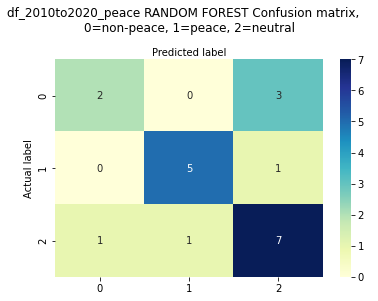

Report:
               precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.83      0.83      0.83         6
         2.0       0.64      0.78      0.70         9

    accuracy                           0.70        20
   macro avg       0.71      0.67      0.68        20
weighted avg       0.70      0.70      0.69        20

Accuracy: 0.7

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [2 1 6]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          2    1    6


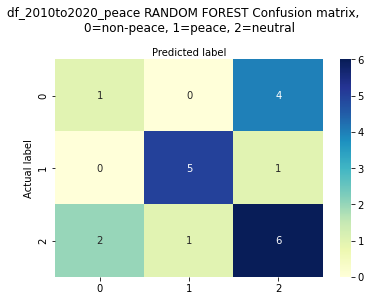

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.83      0.83      0.83         6
         2.0       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.57      0.57      0.56        20
weighted avg       0.58      0.60      0.58        20

Accuracy: 0.6

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          3    2    4


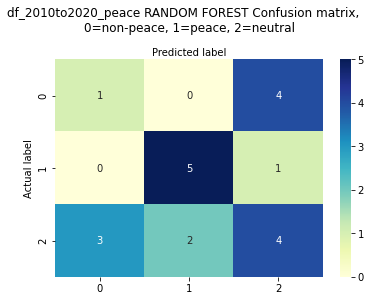

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[3 0 2]
 [0 5 1]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          3    0    2
1.0          0    5    1
2.0          3    2    4


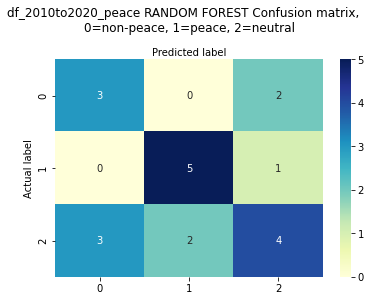

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.71      0.83      0.77         6
         2.0       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.60      0.63      0.60        20
weighted avg       0.60      0.60      0.59        20

Accuracy: 0.6

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[4 0 1]
 [0 4 2]
 [2 2 5]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          4    0    1
1.0          0    4    2
2.0          2    2    5


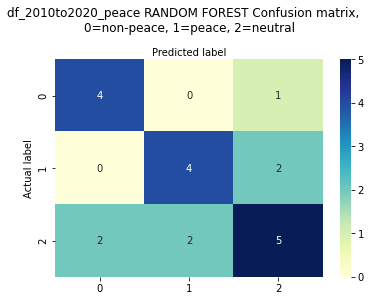

Report:
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.67      0.67      0.67         6
         2.0       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.67      0.66        20
weighted avg       0.65      0.65      0.65        20

Accuracy: 0.65

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[2 0 3]
 [0 5 1]
 [2 3 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          2    0    3
1.0          0    5    1
2.0          2    3    4


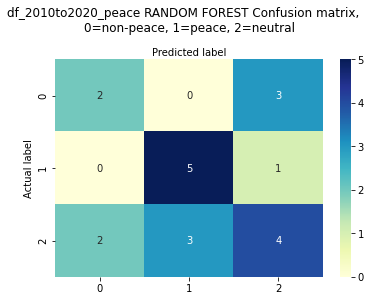

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.62      0.83      0.71         6
         2.0       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.56      0.54        20
weighted avg       0.54      0.55      0.54        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[3 0 2]
 [0 4 2]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          3    0    2
1.0          0    4    2
2.0          3    2    4


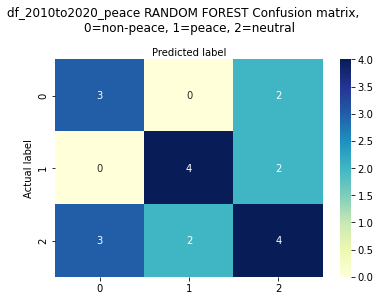

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.67      0.67      0.67         6
         2.0       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.55      0.55      0.55        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[0 0 5]
 [0 5 1]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          0    0    5
1.0          0    5    1
2.0          3    2    4


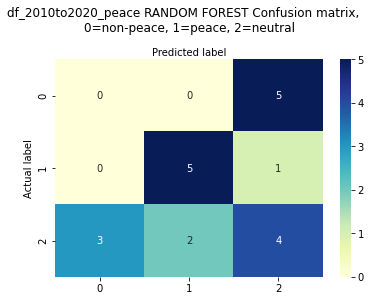

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.71      0.83      0.77         6
         2.0       0.40      0.44      0.42         9

    accuracy                           0.45        20
   macro avg       0.37      0.43      0.40        20
weighted avg       0.39      0.45      0.42        20

Accuracy: 0.45

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [4 1 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          4    1    4


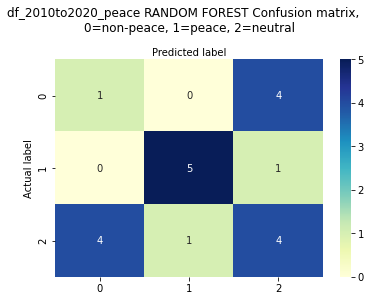

Report:
               precision    recall  f1-score   support

         0.0       0.20      0.20      0.20         5
         1.0       0.83      0.83      0.83         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 4 2]
 [3 1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    4    2
2.0          3    1    5


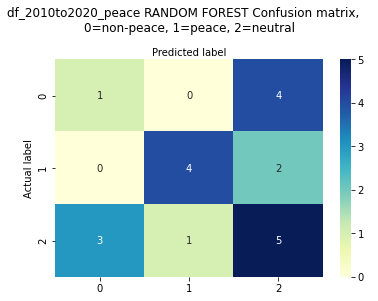

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.80      0.67      0.73         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.50      0.47      0.48        20
weighted avg       0.51      0.50      0.50        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 4 2]
 [2 2 5]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    4    2
2.0          2    2    5


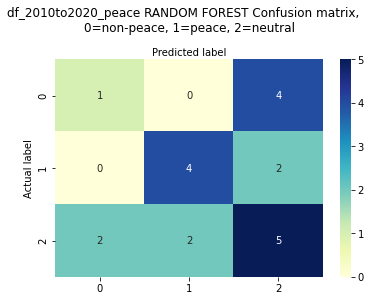

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.67      0.67      0.67         6
         2.0       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.48      0.47      0.47        20
weighted avg       0.49      0.50      0.49        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[1 0 4]
 [0 5 1]
 [3 2 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          1    0    4
1.0          0    5    1
2.0          3    2    4


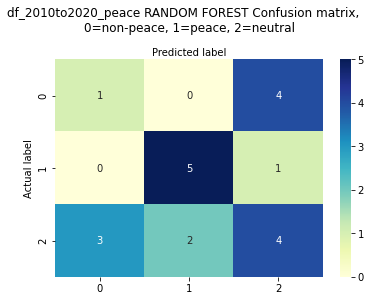

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.71      0.83      0.77         6
         2.0       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.47      0.49      0.48        20
weighted avg       0.48      0.50      0.49        20

Accuracy: 0.5

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[2 0 3]
 [0 5 1]
 [4 1 4]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          2    0    3
1.0          0    5    1
2.0          4    1    4


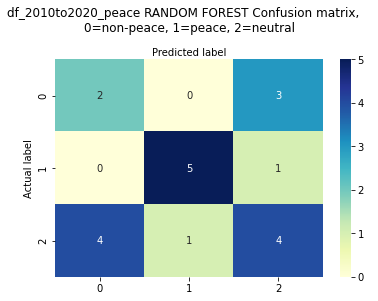

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.83      0.83      0.83         6
         2.0       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.56        20
weighted avg       0.56      0.55      0.55        20

Accuracy: 0.55

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19
[[0 0 5]
 [0 3 3]
 [2 2 5]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          0    0    5
1.0          0    3    3
2.0          2    2    5


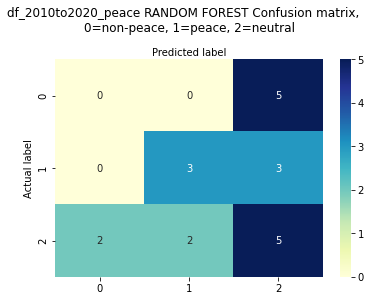

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.60      0.50      0.55         6
         2.0       0.38      0.56      0.45         9

    accuracy                           0.40        20
   macro avg       0.33      0.35      0.33        20
weighted avg       0.35      0.40      0.37        20

Accuracy: 0.4


In [55]:
acc_19 = []

for x in range(20):
    #remove row i, train all else, test i
    predict=np.zeros((rows))
    for m in range(rows):
        # np.delete(data, index, axis)
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        print('\nm =',m)
        #Random Forest classifier
        #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
    
    # create a dataframe to display actual results and predicted results

    df_actu_pred = pd.DataFrame({
        'Actual': df_2010to2020_peace['Group'],
        'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                      predict[8], predict[9], predict[10], predict[11], predict[12], predict[13], predict[14], predict[15], 
                      predict[16], predict[17], predict[18], predict[19]]
    })

    df_actu_pred.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']
    
    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    # adding simple confusion matrix
    print(confusion_matrix(y_test, y_pred))

    matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    print('\nPrediction Matrix\n \n',matrix)

    # adding pretty confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace, 2=neutral', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)
    
    # Report
    print("Report:\n",classification_report(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    
    acc_19.append(accuracy_score(y_test, y_pred))

In [56]:
acc_19

[0.45,
 0.55,
 0.5,
 0.55,
 0.45,
 0.55,
 0.7,
 0.6,
 0.5,
 0.6,
 0.65,
 0.55,
 0.55,
 0.45,
 0.5,
 0.5,
 0.5,
 0.5,
 0.55,
 0.4]

# Does Random Forest Predict Randomly?

                   Actual  Predicted
Australia AU            1        0.0
Bangladesh BD           0        2.0
Canada CA               1        1.0
United Kingdom GB       1        0.0
Ghana GH                2        1.0
Hong Kong HK            2        1.0
Ireland IE              1        0.0
India IN                2        1.0
Jamaica JM              2        1.0
Kenya KE                0        2.0
Sri Lanka LK            2        2.0
Malaysia MY             2        0.0
Nigeria NG              0        1.0
New Zealand NZ          1        1.0
Philippines PH          2        1.0
Pakistan PK             0        1.0
Singapore SG            1        2.0
Tanzania TZ             0        1.0
United States US        2        1.0
South Africa ZA         2        1.0

[[0 3 2]
 [3 2 1]
 [1 7 1]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          0    3    2
1.0          3    2    1
2.0          1    7    1


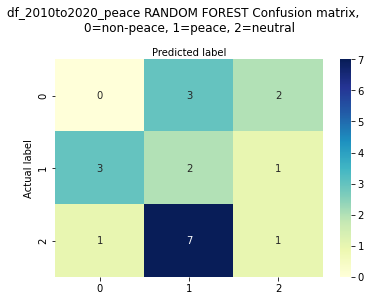

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.17      0.33      0.22         6
         2.0       0.25      0.11      0.15         9

    accuracy                           0.15        20
   macro avg       0.14      0.15      0.13        20
weighted avg       0.16      0.15      0.14        20

Accuracy: 0.15


In [57]:
from random import randrange

# produce 20 random predicted values from 0-3
for x in range(20):
  predict[x]=randrange(3)

# create a dataframe to display actual results and predicted results
df_actu_pred = pd.DataFrame({
    'Actual': df_2010to2020_peace['Group'],
    'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                  predict[8], predict[9], predict[10], predict[11], predict[12], predict[13], predict[14], predict[15], 
                  predict[16], predict[17], predict[18], predict[19]]
})

df_actu_pred.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']
print(df_actu_pred)

y_test=y_train=adata[:,cols-1]
y_pred=predict

# adding simple confusion matrix
print()
print(confusion_matrix(y_test, y_pred))

matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
print('\nPrediction Matrix\n \n',matrix)

# adding pretty confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace, 2=neutral', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

# Report
print("Report:\n",classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

# 10/05/2021 Update:
##   1.   Ignore Neutral Countries, run for peaceful/Non-peaceful

##   2.   Pick 0 (Non-peaceful) 5/20 times, Pick 1 (Peaceful) 6/20 times, Pick 2 (Neutral) 9/20 times

##   3.   Mean value, compute standard deviation


###   1.   Ignore Neutral Countries, run for peaceful/Non-peaceful

### acc_11

In [58]:
data1 = df_2010to2020_peace.copy()

In [59]:
data1 = data1.drop(['Sum', 'Group Name'], axis=1)

In [60]:
data1 = data1.query('Group != 2')

In [61]:
adata = pd.DataFrame(data1).to_numpy()
rows,cols=adata.shape

In [62]:
adata
print("rows:", rows)
print("cols:", cols)

rows: 11
cols: 661


In [63]:
#remove row i, train all else, test i
predict=np.zeros((rows))
for m in range(rows):
    # np.delete(data, index, axis)
    adatam1=np.delete(adata, m, 0)
    X_train=np.delete(adatam1, cols-1, 1)
    y_train=adatam1[:,cols-1]
    print('\nm =',m)
    #Random Forest classifier
    #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
    test_forest2 = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
    test_forest2.fit(X_train, y_train)
    X_test=adata[m,0:cols-1]
    X_test=X_test.reshape(1, -1)
    predict[m]=test_forest2.predict(X_test)


m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10


In [64]:
# create a dataframe to display actual results and predicted results

df_actu_pred_11 = pd.DataFrame({
    'Actual': data1['Group'],
    'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                  predict[8], predict[9], predict[10]]
})

df_actu_pred_11.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ',]

In [65]:
df_actu_pred_11

,Actual,Predicted
Australia AU,1,1.0
Bangladesh BD,0,1.0
Canada CA,1,1.0
United Kingdom GB,1,1.0
Ireland IE,1,1.0
Kenya KE,0,0.0
Nigeria NG,0,0.0
New Zealand NZ,1,1.0
Pakistan PK,0,0.0
Singapore SG,1,0.0


[[4 1]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          4    1
1.0          1    5


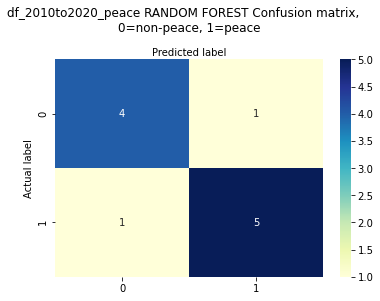

In [66]:
y_test=y_train=adata[:,cols-1]
y_pred=predict

# adding simple confusion matrix
print(confusion_matrix(y_test, y_pred))

matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
print('\nPrediction Matrix\n \n',matrix)

# adding pretty confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show(block=False)

In [67]:
# Report
print("Report:\n",classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Accuracy: 0.8181818181818182



m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[4 1]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          4    1
1.0          1    5


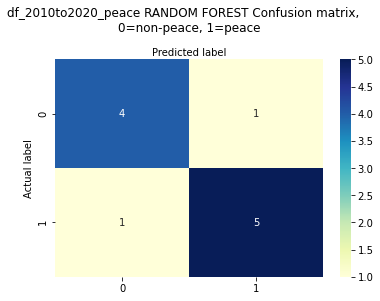

Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Accuracy: 0.8181818181818182

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


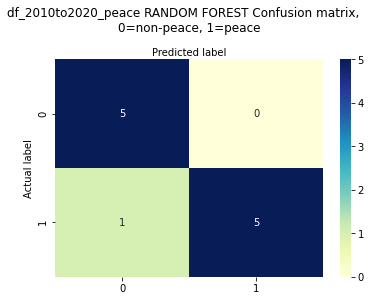

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


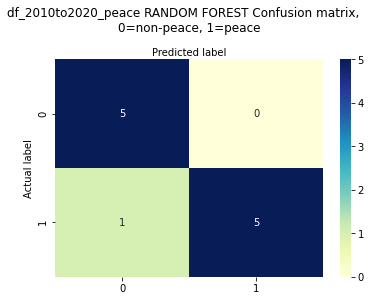

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


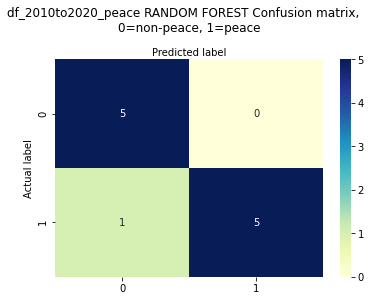

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [0 6]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          0    6


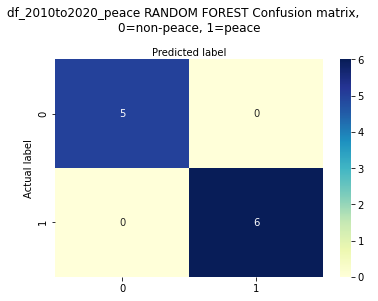

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


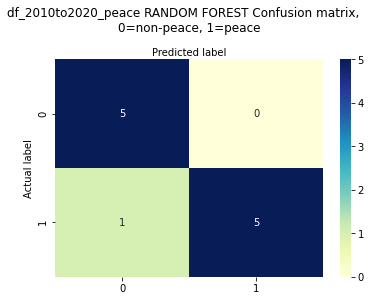

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


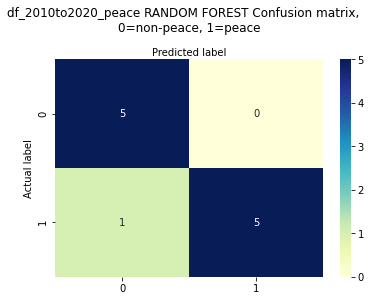

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


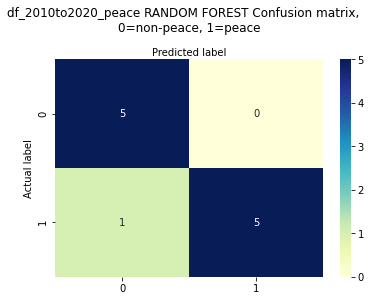

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [0 6]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          0    6


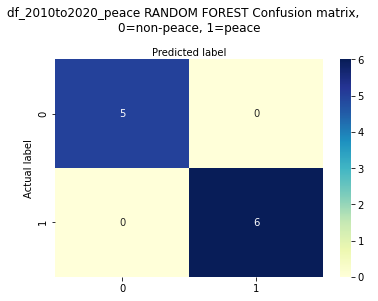

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[4 1]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          4    1
1.0          1    5


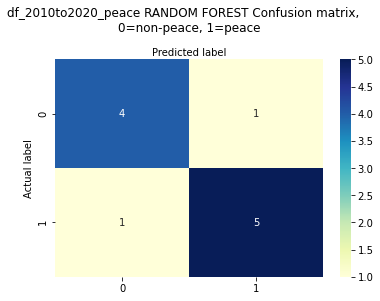

Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Accuracy: 0.8181818181818182

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


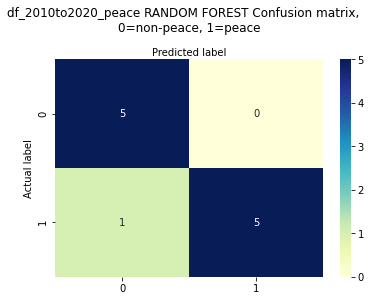

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[4 1]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          4    1
1.0          1    5


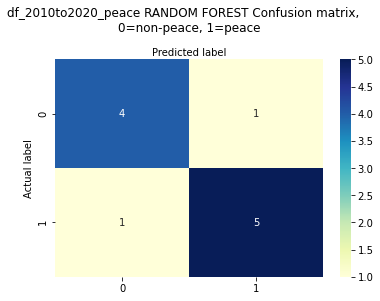

Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.83      0.83      0.83         6

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Accuracy: 0.8181818181818182

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [0 6]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          0    6


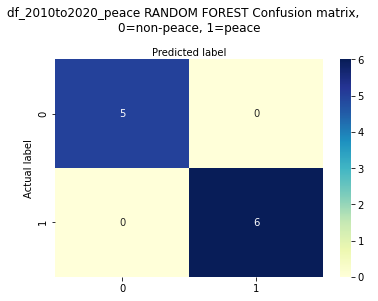

Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


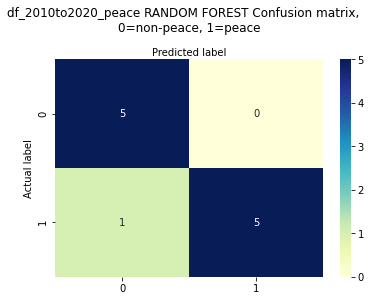

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


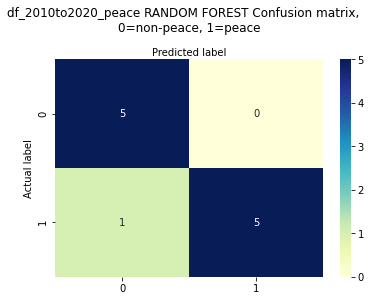

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


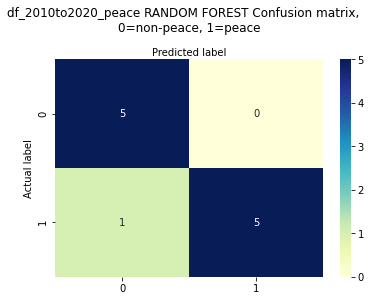

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


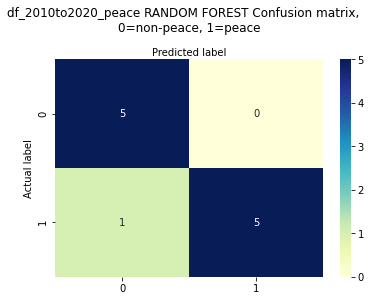

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


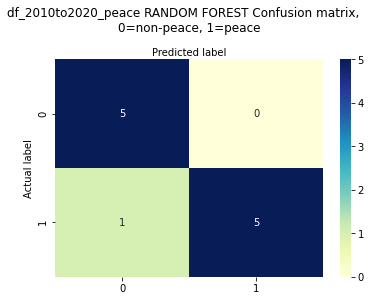

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


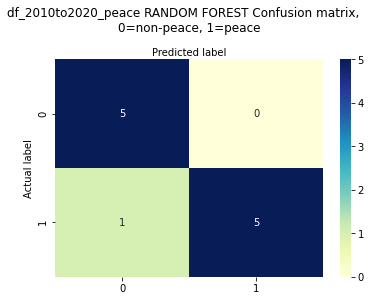

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091

m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10
[[5 0]
 [1 5]]

Prediction Matrix
 
 Predicted  0.0  1.0
Actual             
0.0          5    0
1.0          1    5


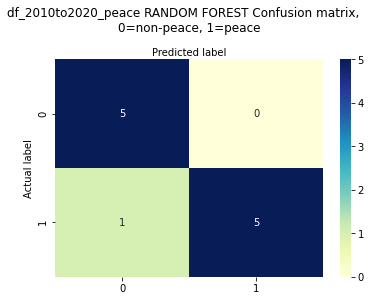

Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

Accuracy: 0.9090909090909091


In [68]:
acc_11 = []
for x in range(20):
#remove row i, train all else, test i
    predict=np.zeros((rows))
    for m in range(rows):
        # np.delete(data, index, axis)
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        print('\nm =',m)
        #Random Forest classifier
        #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
        
    df_actu_pred_11 = pd.DataFrame({
    'Actual': data1['Group'],
    'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                  predict[8], predict[9], predict[10]]
    })

    df_actu_pred_11.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ',]

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    # adding simple confusion matrix
    print(confusion_matrix(y_test, y_pred))

    matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    print('\nPrediction Matrix\n \n',matrix)

    # adding pretty confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)

            # Report
    print("Report:\n",classification_report(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))

    acc_11.append(accuracy_score(y_test, y_pred))



In [69]:
acc_11

[0.8181818181818182,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 1.0,
 0.8181818181818182,
 0.9090909090909091,
 0.8181818181818182,
 1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091]

### 2. Pick 0 (Non-peaceful) 5/20 times, Pick 1 (Peaceful) 6/20 times, Pick 2 (Neutral) 9/20 times

### acc_rand

In [70]:
data2 = df_2010to2020_peace.copy()

In [71]:
data2 = data2.drop(['Sum', 'Group Name'], axis=1)

In [72]:
adata = pd.DataFrame(data2).to_numpy()
rows,cols=adata.shape

In [73]:
adata
print("rows:", rows)
print("cols:", cols)

rows: 20
cols: 661


In [74]:
#remove row i, train all else, test i
predict=np.zeros((rows))
for m in range(rows):
    # np.delete(data, index, axis)
    adatam1=np.delete(adata, m, 0)
    X_train=np.delete(adatam1, cols-1, 1)
    y_train=adatam1[:,cols-1]
    print('\nm =',m)
    #Random Forest classifier
    #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
    forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
    forest.fit(X_train, y_train)
    X_test=adata[m,0:cols-1]
    X_test=X_test.reshape(1, -1)
    predict[m]=forest.predict(X_test)


m = 0

m = 1

m = 2

m = 3

m = 4

m = 5

m = 6

m = 7

m = 8

m = 9

m = 10

m = 11

m = 12

m = 13

m = 14

m = 15

m = 16

m = 17

m = 18

m = 19


                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        2.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        2.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        2.0
Kenya KE                0        1.0
Sri Lanka LK            2        0.0
Malaysia MY             2        1.0
Nigeria NG              0        1.0
New Zealand NZ          1        1.0
Philippines PH          2        2.0
Pakistan PK             0        2.0
Singapore SG            1        2.0
Tanzania TZ             0        2.0
United States US        2        0.0
South Africa ZA         2        2.0

[[0 2 3]
 [0 2 4]
 [2 1 6]]

Prediction Matrix
 
 Predicted  0.0  1.0  2.0
Actual                  
0.0          0    2    3
1.0          0    2    4
2.0          2    1    6


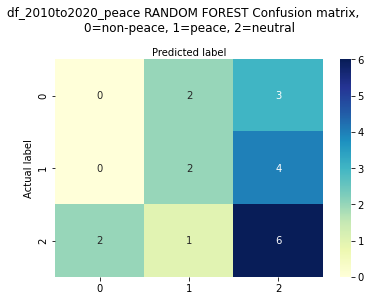

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.40      0.33      0.36         6
         2.0       0.46      0.67      0.55         9

    accuracy                           0.40        20
   macro avg       0.29      0.33      0.30        20
weighted avg       0.33      0.40      0.35        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        2.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        1.0
Hong Kong HK            2        2.0
Ireland IE              1        1.0
India IN                2        1.0
Jamaica JM              2        1.0
Kenya KE                0        1.0
Sri Lanka LK            2        0.0
Malaysia MY             2        1.0
Nigeria NG              0        2.0
New Zealand NZ          1        1.0
Philippines PH          2        2.0
Paki

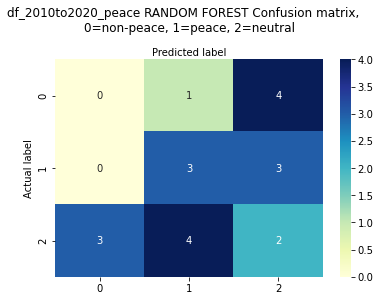

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.38      0.50      0.43         6
         2.0       0.22      0.22      0.22         9

    accuracy                           0.25        20
   macro avg       0.20      0.24      0.22        20
weighted avg       0.21      0.25      0.23        20

Accuracy: 0.25
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        0.0
Canada CA               1        1.0
United Kingdom GB       1        0.0
Ghana GH                2        1.0
Hong Kong HK            2        1.0
Ireland IE              1        2.0
India IN                2        0.0
Jamaica JM              2        0.0
Kenya KE                0        0.0
Sri Lanka LK            2        2.0
Malaysia MY             2        1.0
Nigeria NG              0        0.0
New Zealand NZ          1        2.0
Philippines PH          2        1.0
Pak

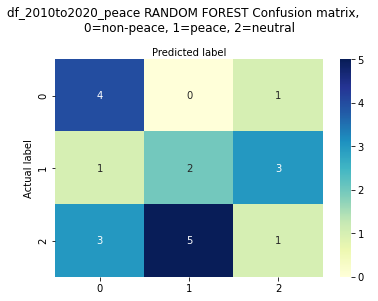

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.80      0.62         5
         1.0       0.29      0.33      0.31         6
         2.0       0.20      0.11      0.14         9

    accuracy                           0.35        20
   macro avg       0.33      0.41      0.36        20
weighted avg       0.30      0.35      0.31        20

Accuracy: 0.35
                   Actual  Predicted
Australia AU            1        0.0
Bangladesh BD           0        1.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        0.0
Hong Kong HK            2        1.0
Ireland IE              1        1.0
India IN                2        0.0
Jamaica JM              2        2.0
Kenya KE                0        1.0
Sri Lanka LK            2        2.0
Malaysia MY             2        0.0
Nigeria NG              0        2.0
New Zealand NZ          1        1.0
Philippines PH          2        1.0
Pak

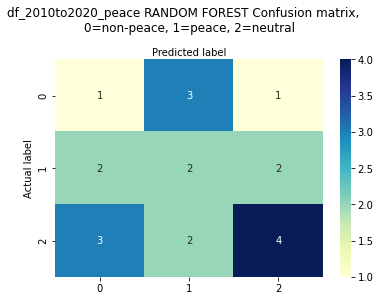

Report:
               precision    recall  f1-score   support

         0.0       0.17      0.20      0.18         5
         1.0       0.29      0.33      0.31         6
         2.0       0.57      0.44      0.50         9

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.33        20
weighted avg       0.38      0.35      0.36        20

Accuracy: 0.35
                   Actual  Predicted
Australia AU            1        0.0
Bangladesh BD           0        0.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        0.0
Hong Kong HK            2        0.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        1.0
Sri Lanka LK            2        1.0
Malaysia MY             2        2.0
Nigeria NG              0        1.0
New Zealand NZ          1        2.0
Philippines PH          2        1.0
Pak

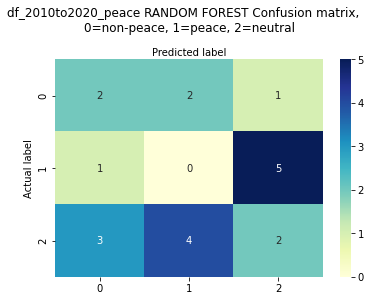

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.00      0.00      0.00         6
         2.0       0.25      0.22      0.24         9

    accuracy                           0.20        20
   macro avg       0.19      0.21      0.20        20
weighted avg       0.20      0.20      0.20        20

Accuracy: 0.2
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        1.0
Canada CA               1        0.0
United Kingdom GB       1        1.0
Ghana GH                2        1.0
Hong Kong HK            2        1.0
Ireland IE              1        1.0
India IN                2        0.0
Jamaica JM              2        2.0
Kenya KE                0        2.0
Sri Lanka LK            2        0.0
Malaysia MY             2        2.0
Nigeria NG              0        1.0
New Zealand NZ          1        0.0
Philippines PH          2        2.0
Paki

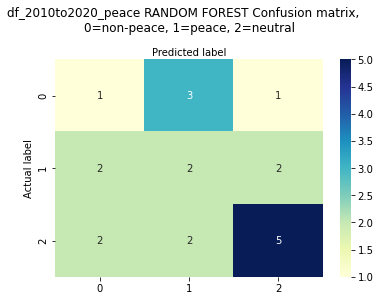

Report:
               precision    recall  f1-score   support

         0.0       0.20      0.20      0.20         5
         1.0       0.29      0.33      0.31         6
         2.0       0.62      0.56      0.59         9

    accuracy                           0.40        20
   macro avg       0.37      0.36      0.37        20
weighted avg       0.42      0.40      0.41        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        0.0
Canada CA               1        2.0
United Kingdom GB       1        1.0
Ghana GH                2        2.0
Hong Kong HK            2        0.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        2.0
Sri Lanka LK            2        1.0
Malaysia MY             2        0.0
Nigeria NG              0        2.0
New Zealand NZ          1        2.0
Philippines PH          2        1.0
Paki

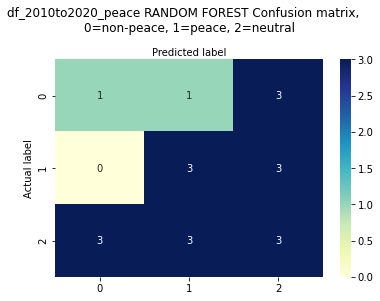

Report:
               precision    recall  f1-score   support

         0.0       0.25      0.20      0.22         5
         1.0       0.43      0.50      0.46         6
         2.0       0.33      0.33      0.33         9

    accuracy                           0.35        20
   macro avg       0.34      0.34      0.34        20
weighted avg       0.34      0.35      0.34        20

Accuracy: 0.35
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        2.0
Canada CA               1        2.0
United Kingdom GB       1        0.0
Ghana GH                2        1.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        2.0
Sri Lanka LK            2        0.0
Malaysia MY             2        0.0
Nigeria NG              0        1.0
New Zealand NZ          1        0.0
Philippines PH          2        0.0
Pak

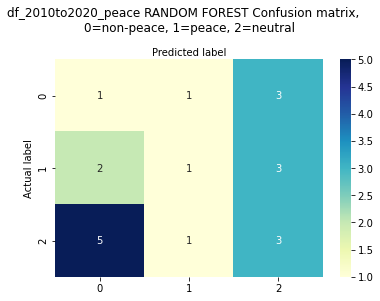

Report:
               precision    recall  f1-score   support

         0.0       0.12      0.20      0.15         5
         1.0       0.33      0.17      0.22         6
         2.0       0.33      0.33      0.33         9

    accuracy                           0.25        20
   macro avg       0.26      0.23      0.24        20
weighted avg       0.28      0.25      0.26        20

Accuracy: 0.25
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        2.0
Canada CA               1        2.0
United Kingdom GB       1        1.0
Ghana GH                2        2.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        2.0
Sri Lanka LK            2        1.0
Malaysia MY             2        0.0
Nigeria NG              0        0.0
New Zealand NZ          1        1.0
Philippines PH          2        1.0
Pak

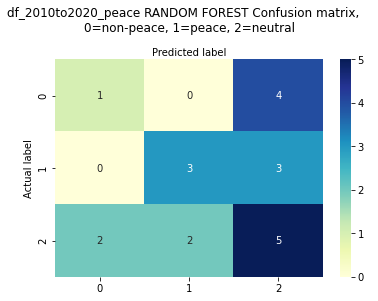

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.60      0.50      0.55         6
         2.0       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.45      0.42      0.42        20
weighted avg       0.45      0.45      0.44        20

Accuracy: 0.45
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        1.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        2.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        1.0
Kenya KE                0        2.0
Sri Lanka LK            2        1.0
Malaysia MY             2        1.0
Nigeria NG              0        2.0
New Zealand NZ          1        2.0
Philippines PH          2        1.0
Pak

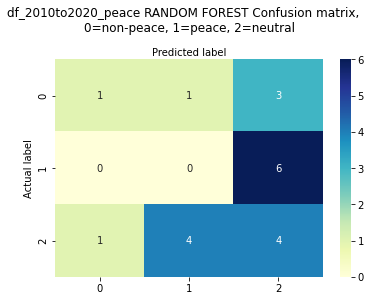

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.00      0.00      0.00         6
         2.0       0.31      0.44      0.36         9

    accuracy                           0.25        20
   macro avg       0.27      0.21      0.22        20
weighted avg       0.26      0.25      0.24        20

Accuracy: 0.25
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        1.0
Canada CA               1        1.0
United Kingdom GB       1        0.0
Ghana GH                2        2.0
Hong Kong HK            2        1.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        2.0
Sri Lanka LK            2        0.0
Malaysia MY             2        2.0
Nigeria NG              0        2.0
New Zealand NZ          1        0.0
Philippines PH          2        1.0
Pak

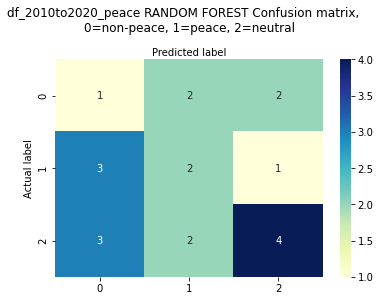

Report:
               precision    recall  f1-score   support

         0.0       0.14      0.20      0.17         5
         1.0       0.33      0.33      0.33         6
         2.0       0.57      0.44      0.50         9

    accuracy                           0.35        20
   macro avg       0.35      0.33      0.33        20
weighted avg       0.39      0.35      0.37        20

Accuracy: 0.35
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        0.0
Canada CA               1        1.0
United Kingdom GB       1        0.0
Ghana GH                2        1.0
Hong Kong HK            2        0.0
Ireland IE              1        1.0
India IN                2        2.0
Jamaica JM              2        2.0
Kenya KE                0        2.0
Sri Lanka LK            2        0.0
Malaysia MY             2        0.0
Nigeria NG              0        0.0
New Zealand NZ          1        2.0
Philippines PH          2        2.0
Pak

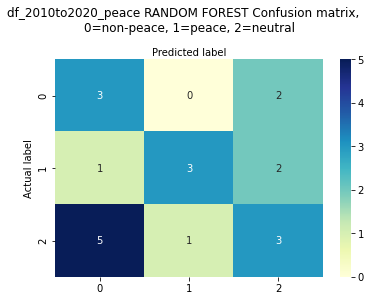

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.60      0.43         5
         1.0       0.75      0.50      0.60         6
         2.0       0.43      0.33      0.38         9

    accuracy                           0.45        20
   macro avg       0.50      0.48      0.47        20
weighted avg       0.50      0.45      0.46        20

Accuracy: 0.45
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        1.0
Canada CA               1        2.0
United Kingdom GB       1        1.0
Ghana GH                2        1.0
Hong Kong HK            2        1.0
Ireland IE              1        2.0
India IN                2        1.0
Jamaica JM              2        2.0
Kenya KE                0        2.0
Sri Lanka LK            2        2.0
Malaysia MY             2        2.0
Nigeria NG              0        1.0
New Zealand NZ          1        1.0
Philippines PH          2        1.0
Pak

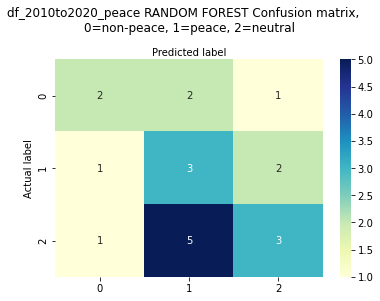

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.30      0.50      0.37         6
         2.0       0.50      0.33      0.40         9

    accuracy                           0.40        20
   macro avg       0.43      0.41      0.41        20
weighted avg       0.44      0.40      0.40        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        2.0
Canada CA               1        2.0
United Kingdom GB       1        2.0
Ghana GH                2        1.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        2.0
Jamaica JM              2        2.0
Kenya KE                0        1.0
Sri Lanka LK            2        1.0
Malaysia MY             2        1.0
Nigeria NG              0        1.0
New Zealand NZ          1        2.0
Philippines PH          2        0.0
Paki

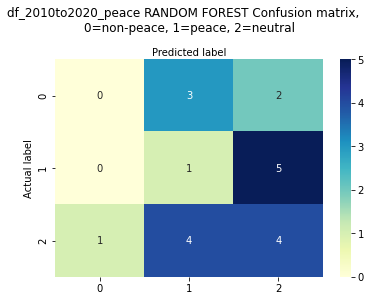

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.12      0.17      0.14         6
         2.0       0.36      0.44      0.40         9

    accuracy                           0.25        20
   macro avg       0.16      0.20      0.18        20
weighted avg       0.20      0.25      0.22        20

Accuracy: 0.25
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        1.0
Canada CA               1        2.0
United Kingdom GB       1        0.0
Ghana GH                2        1.0
Hong Kong HK            2        1.0
Ireland IE              1        2.0
India IN                2        0.0
Jamaica JM              2        2.0
Kenya KE                0        0.0
Sri Lanka LK            2        1.0
Malaysia MY             2        0.0
Nigeria NG              0        2.0
New Zealand NZ          1        0.0
Philippines PH          2        1.0
Pak

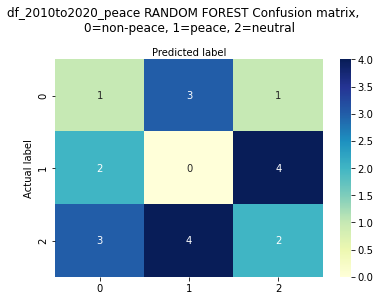

Report:
               precision    recall  f1-score   support

         0.0       0.17      0.20      0.18         5
         1.0       0.00      0.00      0.00         6
         2.0       0.29      0.22      0.25         9

    accuracy                           0.15        20
   macro avg       0.15      0.14      0.14        20
weighted avg       0.17      0.15      0.16        20

Accuracy: 0.15
                   Actual  Predicted
Australia AU            1        0.0
Bangladesh BD           0        1.0
Canada CA               1        1.0
United Kingdom GB       1        2.0
Ghana GH                2        0.0
Hong Kong HK            2        2.0
Ireland IE              1        1.0
India IN                2        2.0
Jamaica JM              2        0.0
Kenya KE                0        2.0
Sri Lanka LK            2        1.0
Malaysia MY             2        1.0
Nigeria NG              0        2.0
New Zealand NZ          1        0.0
Philippines PH          2        2.0
Pak

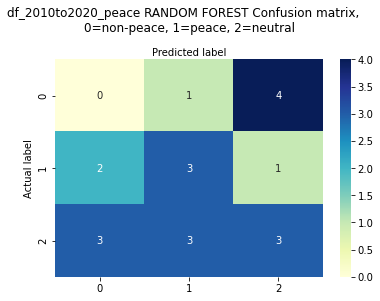

Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.43      0.50      0.46         6
         2.0       0.38      0.33      0.35         9

    accuracy                           0.30        20
   macro avg       0.27      0.28      0.27        20
weighted avg       0.30      0.30      0.30        20

Accuracy: 0.3
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        1.0
Canada CA               1        0.0
United Kingdom GB       1        0.0
Ghana GH                2        2.0
Hong Kong HK            2        2.0
Ireland IE              1        1.0
India IN                2        0.0
Jamaica JM              2        2.0
Kenya KE                0        1.0
Sri Lanka LK            2        0.0
Malaysia MY             2        2.0
Nigeria NG              0        2.0
New Zealand NZ          1        2.0
Philippines PH          2        1.0
Paki

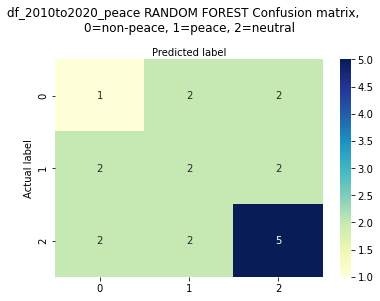

Report:
               precision    recall  f1-score   support

         0.0       0.20      0.20      0.20         5
         1.0       0.33      0.33      0.33         6
         2.0       0.56      0.56      0.56         9

    accuracy                           0.40        20
   macro avg       0.36      0.36      0.36        20
weighted avg       0.40      0.40      0.40        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        2.0
Bangladesh BD           0        0.0
Canada CA               1        0.0
United Kingdom GB       1        2.0
Ghana GH                2        1.0
Hong Kong HK            2        2.0
Ireland IE              1        1.0
India IN                2        1.0
Jamaica JM              2        2.0
Kenya KE                0        2.0
Sri Lanka LK            2        2.0
Malaysia MY             2        1.0
Nigeria NG              0        1.0
New Zealand NZ          1        2.0
Philippines PH          2        2.0
Paki

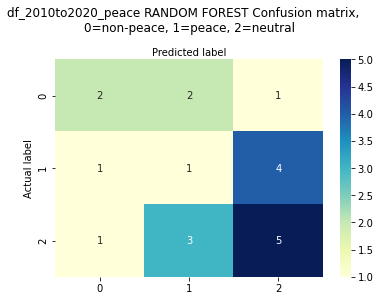

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.17      0.17      0.17         6
         2.0       0.50      0.56      0.53         9

    accuracy                           0.40        20
   macro avg       0.39      0.37      0.38        20
weighted avg       0.40      0.40      0.40        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        0.0
Canada CA               1        0.0
United Kingdom GB       1        1.0
Ghana GH                2        0.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        1.0
Jamaica JM              2        1.0
Kenya KE                0        2.0
Sri Lanka LK            2        1.0
Malaysia MY             2        2.0
Nigeria NG              0        1.0
New Zealand NZ          1        1.0
Philippines PH          2        2.0
Paki

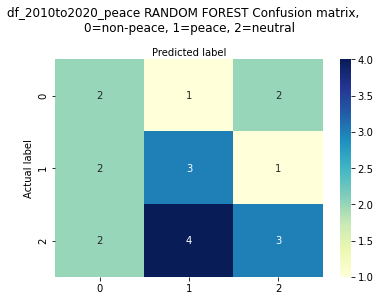

Report:
               precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.38      0.50      0.43         6
         2.0       0.50      0.33      0.40         9

    accuracy                           0.40        20
   macro avg       0.40      0.41      0.40        20
weighted avg       0.42      0.40      0.40        20

Accuracy: 0.4
                   Actual  Predicted
Australia AU            1        1.0
Bangladesh BD           0        1.0
Canada CA               1        0.0
United Kingdom GB       1        1.0
Ghana GH                2        2.0
Hong Kong HK            2        2.0
Ireland IE              1        2.0
India IN                2        0.0
Jamaica JM              2        0.0
Kenya KE                0        0.0
Sri Lanka LK            2        2.0
Malaysia MY             2        2.0
Nigeria NG              0        0.0
New Zealand NZ          1        2.0
Philippines PH          2        2.0
Paki

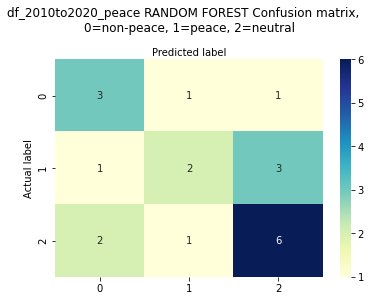

Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.50      0.33      0.40         6
         2.0       0.60      0.67      0.63         9

    accuracy                           0.55        20
   macro avg       0.53      0.53      0.53        20
weighted avg       0.54      0.55      0.54        20

Accuracy: 0.55


In [75]:
from random import randrange

acc_rand = []
for x in range(20):
    # produce 20 random predicted values from 0-3
    for x in range(20):
      predict[x]= np.random.choice(df_actu_pred['Actual'].values, size=1)

    # create a dataframe to display actual results and predicted results
    df_actu_pred = pd.DataFrame({
        'Actual': df_2010to2020_peace['Group'],
        'Predicted': [predict[0], predict[1], predict[2], predict[3], predict[4], predict[5], predict[6], predict[7], 
                      predict[8], predict[9], predict[10], predict[11], predict[12], predict[13], predict[14], predict[15], 
                      predict[16], predict[17], predict[18], predict[19]]
    })

    df_actu_pred.index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA']
    print(df_actu_pred)

    y_test=y_train=adata[:,cols-1]
    y_pred=predict

    # adding simple confusion matrix
    print()
    print(confusion_matrix(y_test, y_pred))

    matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    print('\nPrediction Matrix\n \n',matrix)

    # adding pretty confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('df_2010to2020_peace RANDOM FOREST Confusion matrix,   \n0=non-peace, 1=peace, 2=neutral', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)

    # Report
    print("Report:\n",classification_report(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    
    acc_rand.append(accuracy_score(y_test, y_pred))

## Mean value, compute standard deviation

In [76]:
acc_19

[0.45,
 0.55,
 0.5,
 0.55,
 0.45,
 0.55,
 0.7,
 0.6,
 0.5,
 0.6,
 0.65,
 0.55,
 0.55,
 0.45,
 0.5,
 0.5,
 0.5,
 0.5,
 0.55,
 0.4]

In [77]:
np.mean(acc_19)

0.53

In [78]:
np.std(acc_19)

0.06964194138592059

In [79]:
np.std(acc_19, ddof=1) / np.sqrt(np.size(acc_19))

0.015976957091221617

In [80]:
acc_11

[0.8181818181818182,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 1.0,
 0.8181818181818182,
 0.9090909090909091,
 0.8181818181818182,
 1.0,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091]

In [81]:
np.mean(acc_11)

0.9090909090909092

In [82]:
np.std(acc_11)

0.04979295977319691

In [83]:
np.std(acc_11, ddof=1) / np.sqrt(np.size(acc_11))

0.01142328840795533

In [84]:
acc_rand

[0.4,
 0.25,
 0.35,
 0.35,
 0.2,
 0.4,
 0.35,
 0.25,
 0.45,
 0.25,
 0.35,
 0.45,
 0.4,
 0.25,
 0.15,
 0.3,
 0.4,
 0.4,
 0.4,
 0.55]

In [85]:
np.mean(acc_rand)

0.3450000000000001

In [86]:
np.std(acc_rand)

0.09473647660748209

In [87]:
np.std(acc_rand, ddof=1) / np.sqrt(np.size(acc_rand))

0.02173403830521681

In [88]:
 #Lin's Method for Importance Features:
    
important_lst = list()
q = [[0 for x in range(2)] for y in range(cols-1)]

importances = test_forest1.feature_importances_

for i in range(cols - 1):
    q[i][0]=data1.columns[i]
    q[i][1]=importances[i]
    df_importance=pd.DataFrame(q)
    df_importance.columns=['Word', 'Importance']
    sort=df_importance.sort_values(by=['Importance'], ascending=False)
    important_lst.append(sort.iloc[0][0])

In [89]:
important_lst_one = df_importance[df_importance.Importance > 0]

In [90]:
important_lst_one

,Word,Importance
1,a,0.014805
2,able,0.004071
16,after,0.013606
21,all,0.046015
23,already,0.014559
...,...,...
622,water,0.009243
623,way,0.005099
632,when,0.016994
643,within,0.012790


In [91]:
pd.set_option('display.max_rows', None)

In [92]:
important_lst_one.sort_values(by='Importance', ascending=False)

,Word,Importance
21,all,0.046015
514,seen,0.038686
125,country,0.038166
39,around,0.034232
438,people,0.030515
648,working,0.026570
147,development,0.025622
58,been,0.025195
237,government,0.025195
200,few,0.024896


In [93]:
# df_importance_quotes = df_importance.style.applymap(lambda x: 'background-color : yellow' if x in important_lst else '')

In [94]:
# df_importance_quotes.to_excel('df_importance_quotes.xlsx', engine='openpyxl', index=False) 

In [95]:
important_lst_one10 = important_lst_one.nlargest(10, 'Importance')
important_lst_one10 = important_lst_one10.set_index('Word')

In [96]:
important_lst_one10

,Importance
Word,
all,0.046015
seen,0.038686
country,0.038166
around,0.034232
people,0.030515
working,0.026570
development,0.025622
been,0.025195
government,0.025195


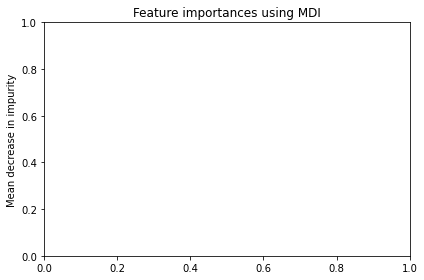

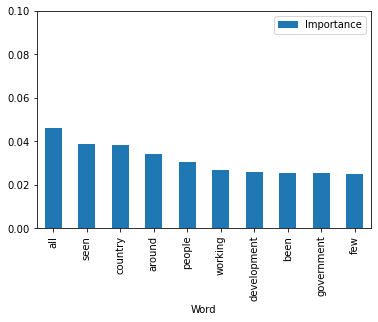

In [97]:
fig, ax = plt.subplots()
important_lst_one10.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.ylim(0, .1)
fig.tight_layout()

In [98]:
#Lin's Method for Importance Features:
    
important_lst = list()
q = [[0 for x in range(2)] for y in range(cols-1)]

importances = test_forest2.feature_importances_

for i in range(cols - 1):
    q[i][0]=data1.columns[i]
    q[i][1]=importances[i]
    df_importance=pd.DataFrame(q)
    df_importance.columns=['Word', 'Importance']
    sort=df_importance.sort_values(by=['Importance'], ascending=False)
    important_lst.append(sort.iloc[0][0])

In [99]:
important_lst_two = df_importance[df_importance.Importance > 0]

In [100]:
important_lst_two.sort_values(by='Importance', ascending=False)

,Word,Importance
1,a,0.04
343,lot,0.04
584,think,0.04
583,things,0.04
575,then,0.04
571,that's,0.04
514,seen,0.04
506,say,0.04
484,really,0.04
479,quite,0.04


In [101]:
important_lst_two10 = important_lst_two.nlargest(10, 'Importance')
important_lst_two10 = important_lst_two10.set_index('Word')

In [102]:
important_lst_two10

,Importance
Word,
a,0.04
around,0.04
committee,0.04
could,0.04
court,0.04
from,0.04
general,0.04
getting,0.04
going,0.04


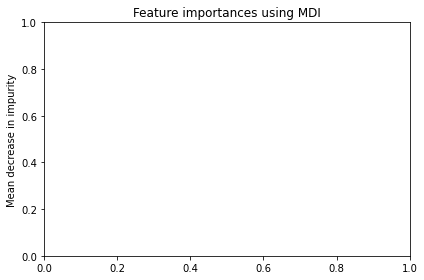

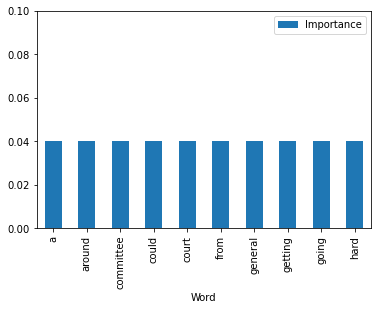

In [103]:
fig, ax = plt.subplots()
important_lst_two10.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.ylim(0, .1)
fig.tight_layout()

# Logistic Regression: 11/16/2021

### Wikipedia Example:

In [104]:
hours = [.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passfail = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [105]:
logregtest = pd.DataFrame()

In [106]:
logregtest["Hours"] = hours

In [107]:
logregtest["Pass"] = passfail

In [108]:
logregtest

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


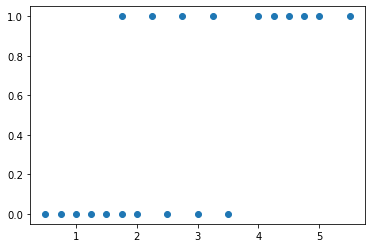

In [109]:
x = logregtest.Hours
y = logregtest.Pass

plt.scatter(x, y)
plt.show()

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')
#Convert a 1D array to a 2D array in numpy
x = x.values.reshape(-1,1)
#Run Logistic Regression
logreg.fit(x, y)

LogisticRegression(C=10000, multi_class='ovr')

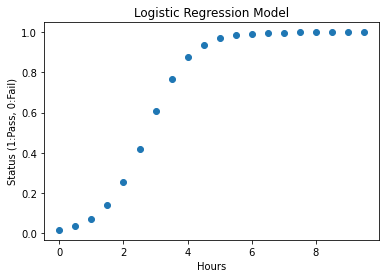

In [111]:
hours = np.arange(0, 10, 0.5)
probabilities= []
for i in hours:
    p_fail, p_pass = logreg.predict_proba([[i]])[0]
    probabilities.append(p_pass)
plt.scatter(hours,probabilities)
plt.title("Logistic Regression Model")
plt.xlabel('Hours')
plt.ylabel('Status (1:Pass, 0:Fail)')
plt.show()

In [112]:
logreg.coef_

array([[1.50458575]])

In [113]:
logreg.intercept_

array([-4.07756199])

In [114]:
for i in logreg.coef_:
    for j in i:
        print(j)
        log_co = j

1.5045857465226222


In [115]:
for i in logreg.intercept_:
    print(i)
    log_int = i

-4.077561989266637


In [116]:
from math import exp

In [117]:
print(1 / (1 + exp(-1*log_int + -1*log_co*2)))

0.2557092877664774


In [118]:
(1 / (1 + exp(-1*log_int + -1*log_co* 4)))

0.8744379190824895

In [119]:
(1 / (1 + exp(-1*log_int + ((-1*log_co* 2) + (-1*log_co* 2)))))

0.8744379190824895

### Peaceful and Non-Peaceful Logistic Regression Model

In [120]:
## data1 is a list of only Peaceful and Not Peaceful Countries
# data1 = data1.drop(['Sum', 'Group Name'], axis=1)
# data1 = data1.query('Group != 2')
data1

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Group
Australia AU,0.000000,0.038334,0.001195,0.004784,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,...,0.002070,0.002209,0.000000,0.007118,0.000787,0.000754,0.001570,0.000000,0.000000,1
Bangladesh BD,0.000000,0.031279,0.001074,0.003897,0.000000,0.000000,0.000000,0.000000,0.000697,0.000000,...,0.001543,0.001751,0.000604,0.004430,0.000000,0.000000,0.001043,0.000000,0.000000,0
Canada CA,0.000000,0.038654,0.001270,0.004712,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,...,0.002116,0.002162,0.000000,0.008208,0.001119,0.000601,0.001624,0.000000,0.000000,1
United Kingdom GB,0.000000,0.039580,0.000836,0.004538,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000,...,0.001610,0.001980,0.000000,0.006414,0.000000,0.000745,0.001248,0.000000,0.000000,1
Ireland IE,0.000000,0.038270,0.000771,0.004029,0.000625,0.000000,0.000771,0.000000,0.000000,0.000000,...,0.002115,0.002259,0.000000,0.005865,0.000000,0.000764,0.001223,0.000000,0.000000,1
Kenya KE,0.000000,0.026791,0.000856,0.002271,0.000000,0.000639,0.000600,0.000672,0.000000,0.000000,...,0.001488,0.001417,0.000757,0.005145,0.000000,0.000000,0.001140,0.000000,0.000000,0
Nigeria NG,0.000718,0.023676,0.000781,0.002672,0.000000,0.000000,0.000702,0.000669,0.000592,0.000668,...,0.001024,0.001420,0.000000,0.006176,0.000000,0.000000,0.001592,0.000000,0.000000,0
New Zealand NZ,0.000000,0.038626,0.001123,0.004591,0.000000,0.000000,0.000667,0.000000,0.000000,0.000000,...,0.002013,0.002054,0.000000,0.006317,0.000641,0.000714,0.001348,0.000000,0.002832,1
Pakistan PK,0.000000,0.029728,0.000726,0.003227,0.000000,0.000000,0.000000,0.000000,0.000803,0.000000,...,0.001538,0.001665,0.000000,0.003624,0.000000,0.000000,0.000922,0.000000,0.000000,0
Singapore SG,0.000000,0.034234,0.001067,0.003737,0.000000,0.000000,0.000683,0.000000,0.000000,0.000000,...,0.001647,0.001933,0.000000,0.005035,0.000000,0.000000,0.001181,0.000000,0.000000,1


In [121]:
input_cols = data1.columns[:660]
input_cols

Index(['2019', 'a', 'able', 'about', 'absolutely', 'access', 'across', 'act',
       'action', 'activities',
       ...
       'would', 'year', 'years', 'yet', 'you', 'you're', 'young', 'your',
       'youth', 'zealand'],
      dtype='object', length=660)

In [124]:
list_coefs = []
list_words = []
list_inters = []
for (columnName, columnData) in data1.iteritems():
    s = []
    s.append(columnData.values)
    x = np.asarray(s)
    y = data1.Group.values
    logreg = LogisticRegression(solver='liblinear')
#     logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')
    #Convert a 1D array to a 2D array in numpy
    x = x.reshape(-1,1)
    #Run Logistic Regression
    logreg.fit(x, y)
    
    for i in logreg.coef_:
        for j in i:
            list_coefs.append(j)
    
    for i in logreg.intercept_:
        list_inters.append(i)
        
    list_words.append(columnName)

Coef_Table = pd.DataFrame()

Coef_Table['Word'] = list_words
Coef_Table['Coefficients'] = list_coefs
Coef_Table['Intercepts'] = list_inters

In [125]:
Coef_Table

,Word,Coefficients,Intercepts
0,2019,-0.000383,0.133478
1,a,0.034394,0.132647
2,able,0.000602,0.133478
3,about,0.004867,0.133465
4,absolutely,0.000291,0.133478
5,access,-0.000919,0.133479
6,across,0.000797,0.133478
7,act,-0.000715,0.133478
8,action,-0.001115,0.133479
9,activities,-0.000816,0.133478


In [126]:
## DROP Group Row, Not a Word
# Coef_Table = Coef_Table.drop(660)

In [127]:
Coef_Table

,Word,Coefficients,Intercepts
0,2019,-0.000383,0.133478
1,a,0.034394,0.132647
2,able,0.000602,0.133478
3,about,0.004867,0.133465
4,absolutely,0.000291,0.133478
5,access,-0.000919,0.133479
6,across,0.000797,0.133478
7,act,-0.000715,0.133478
8,action,-0.001115,0.133479
9,activities,-0.000816,0.133478


In [128]:
data3 = data2.copy()
data3 = data3.query('Group == 2')
data3

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Group
Ghana GH,0.0,0.028687,0.001067,0.003522,0.0,0.000000,0.000000,0.000611,0.000000,0.000000,...,0.001450,0.001742,0.000000,0.007426,0.000000,0.000591,0.001765,0.0,0.0,2
Hong Kong HK,0.0,0.033456,0.000868,0.003581,0.0,0.000000,0.000678,0.000000,0.000000,0.000000,...,0.001669,0.002197,0.000000,0.004863,0.000000,0.000000,0.000991,0.0,0.0,2
India IN,0.0,0.030132,0.000766,0.003376,0.0,0.000000,0.000756,0.000963,0.000947,0.000000,...,0.001600,0.001922,0.000000,0.003417,0.000000,0.000000,0.000832,0.0,0.0,2
Jamaica JM,0.0,0.031179,0.001298,0.002948,0.0,0.000552,0.000636,0.000000,0.000000,0.000000,...,0.001843,0.001779,0.000000,0.007727,0.000000,0.000855,0.001694,0.0,0.0,2
Sri Lanka LK,0.0,0.030496,0.000947,0.002557,0.0,0.000000,0.000000,0.000680,0.000915,0.000000,...,0.001800,0.001795,0.000000,0.003645,0.000000,0.000000,0.000945,0.0,0.0,2
Malaysia MY,0.0,0.028177,0.001047,0.002920,0.0,0.000000,0.000000,0.000776,0.000855,0.000637,...,0.002190,0.001693,0.000000,0.003332,0.000000,0.000000,0.000780,0.0,0.0,2
Philippines PH,0.0,0.028062,0.001190,0.002801,0.0,0.000000,0.000000,0.000656,0.000000,0.000000,...,0.001780,0.001495,0.000613,0.005269,0.000000,0.000000,0.001279,0.0,0.0,2
United States US,0.0,0.037449,0.001281,0.004961,0.0,0.000000,0.000533,0.000000,0.000000,0.000000,...,0.001716,0.001892,0.000000,0.008979,0.001115,0.000000,0.001791,0.0,0.0,2
South Africa ZA,0.0,0.033239,0.000952,0.003467,0.0,0.000000,0.000000,0.000602,0.000000,0.000000,...,0.001720,0.001693,0.000000,0.005146,0.000000,0.000620,0.001195,0.0,0.0,2


In [129]:
for (a, b) in data3.iterrows():
    if (a == 'Ghana GH'):
        Coef_Table['Ghana GH'] = b.values
    if (a == 'Hong Kong HK'):
        Coef_Table['Honk Kong HK'] = b.values
    if (a == 'India IN'):
        Coef_Table['India IN'] = b.values
    if (a == 'Jamaica JM'):
        Coef_Table['Jamaica JM'] = b.values
    if (a == 'Sri Lanka LK'):
        Coef_Table['Sri Lanka LK'] = b.values
    if (a == 'Malaysia MY'):
        Coef_Table['Malaysia MY'] = b.values
    if (a == 'Philippines PH'):
        Coef_Table['Philippines PH'] = b.values
    if (a == 'United States US'):
        Coef_Table['United States US'] = b.values
    if (a == 'South Africa ZA'):
        Coef_Table['South Africa ZA'] = b.values

In [130]:
Coef_Table

,Word,Coefficients,Intercepts,Ghana GH,Honk Kong HK,India IN,Jamaica JM,Sri Lanka LK,Malaysia MY,Philippines PH,United States US,South Africa ZA
0,2019,-0.000383,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,a,0.034394,0.132647,0.028687,0.033456,0.030132,0.031179,0.030496,0.028177,0.028062,0.037449,0.033239
2,able,0.000602,0.133478,0.001067,0.000868,0.000766,0.001298,0.000947,0.001047,0.001190,0.001281,0.000952
3,about,0.004867,0.133465,0.003522,0.003581,0.003376,0.002948,0.002557,0.002920,0.002801,0.004961,0.003467
4,absolutely,0.000291,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,access,-0.000919,0.133479,0.000000,0.000000,0.000000,0.000552,0.000000,0.000000,0.000000,0.000000,0.000000
6,across,0.000797,0.133478,0.000000,0.000678,0.000756,0.000636,0.000000,0.000000,0.000000,0.000533,0.000000
7,act,-0.000715,0.133478,0.000611,0.000000,0.000963,0.000000,0.000680,0.000776,0.000656,0.000000,0.000602
8,action,-0.001115,0.133479,0.000000,0.000000,0.000947,0.000000,0.000915,0.000855,0.000000,0.000000,0.000000
9,activities,-0.000816,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000637,0.000000,0.000000,0.000000


In [131]:
Coef_Table = Coef_Table.drop(660)

In [132]:
Coef_Table

,Word,Coefficients,Intercepts,Ghana GH,Honk Kong HK,India IN,Jamaica JM,Sri Lanka LK,Malaysia MY,Philippines PH,United States US,South Africa ZA
0,2019,-0.000383,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,a,0.034394,0.132647,0.028687,0.033456,0.030132,0.031179,0.030496,0.028177,0.028062,0.037449,0.033239
2,able,0.000602,0.133478,0.001067,0.000868,0.000766,0.001298,0.000947,0.001047,0.001190,0.001281,0.000952
3,about,0.004867,0.133465,0.003522,0.003581,0.003376,0.002948,0.002557,0.002920,0.002801,0.004961,0.003467
4,absolutely,0.000291,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,access,-0.000919,0.133479,0.000000,0.000000,0.000000,0.000552,0.000000,0.000000,0.000000,0.000000,0.000000
6,across,0.000797,0.133478,0.000000,0.000678,0.000756,0.000636,0.000000,0.000000,0.000000,0.000533,0.000000
7,act,-0.000715,0.133478,0.000611,0.000000,0.000963,0.000000,0.000680,0.000776,0.000656,0.000000,0.000602
8,action,-0.001115,0.133479,0.000000,0.000000,0.000947,0.000000,0.000915,0.000855,0.000000,0.000000,0.000000
9,activities,-0.000816,0.133478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000637,0.000000,0.000000,0.000000


In [133]:
gh_freq = Coef_Table['Ghana GH']
hk_freq = Coef_Table['Honk Kong HK']
in_freq = Coef_Table['India IN']
jm_freq = Coef_Table['Jamaica JM']
lk_freq = Coef_Table['Sri Lanka LK']
my_freq = Coef_Table['Malaysia MY']
ph_freq = Coef_Table['Philippines PH']
us_freq = Coef_Table['United States US']
za_freq = Coef_Table['South Africa ZA']
coefs = Coef_Table['Coefficients']

In [134]:
Coef_Table['Coefficients']

0     -0.000383
1      0.034394
2      0.000602
3      0.004867
4      0.000291
5     -0.000919
6      0.000797
7     -0.000715
8     -0.001115
9     -0.000816
10     0.001127
11    -0.000361
12    -0.000398
13    -0.000364
14    -0.001592
15    -0.000549
16    -0.001379
17     0.000571
18    -0.002129
19    -0.000358
20    -0.000388
21    -0.000465
22    -0.000309
23    -0.001715
24    -0.003457
25     0.001755
26    -0.001142
27    -0.001200
28     0.003502
29     0.000000
30    -0.002815
31     0.000000
32     0.000653
33    -0.000727
34     0.000885
35    -0.000589
36    -0.006081
37    -0.000258
38    -0.002145
39     0.001862
40    -0.003314
41     0.000000
42     0.000267
43    -0.000342
44     0.003116
45     0.000292
46     0.000882
47     0.000589
48    -0.000372
49     0.001362
50     0.002066
51    -0.002384
52    -0.000898
53     0.000000
54     0.000000
55     0.002414
56    -0.000263
57    -0.000420
58     0.001783
59    -0.000331
60     0.000647
61     0.000165
62     0

In [135]:
# logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')
# #Convert a 1D array to a 2D array in numpy
# x = x.reshape(-1,1)
# #Run Logistic Regression
# logreg.fit(x, y)

# logreg.coef_

In [136]:
print(Coef_Table['Intercepts'].mean())

0.1334819621725422


In [137]:
# for (a, b) in zip(in_freq, coefs):
#     total_co_freq_in += -1*b*a
# pred_in = (1 / (1 + exp(-1*(0.18233) + total_co_freq_in)))

In [138]:
total_co_freq_gh = 0
total_co_freq_hk = 0
total_co_freq_in = 0
total_co_freq_jm = 0
total_co_freq_lk = 0
total_co_freq_my = 0
total_co_freq_ph = 0
total_co_freq_us = 0
total_co_freq_za = 0
for (a, b) in zip(gh_freq, coefs):
    total_co_freq_gh += -1*b*a
pred_gh = (1 / (1 + exp(-1*(0.18233) + total_co_freq_gh)))
for (a, b) in zip(hk_freq, coefs):
    total_co_freq_hk += -1*b*a
pred_hk = (1 / (1 + exp(-1*(0.18233) + total_co_freq_hk)))
for (a, b) in zip(in_freq, coefs):
    total_co_freq_in += -1*b*a
pred_in = (1 / (1 + exp(-1*(0.18233) + total_co_freq_in)))
for (a, b) in zip(jm_freq, coefs):
    total_co_freq_jm += -1*b*a
pred_jm = (1 / (1 + exp(-1*(0.18233) + total_co_freq_jm)))
for (a, b) in zip(lk_freq, coefs):
    total_co_freq_lk += -1*b*a
pred_lk = (1 / (1 + exp(-1*(0.18233) + total_co_freq_lk)))
for (a, b) in zip(my_freq, coefs):
    total_co_freq_my += -1*b*a
pred_my = (1 / (1 + exp(-1*(0.18233) + total_co_freq_my)))
for (a, b) in zip(ph_freq, coefs):
    total_co_freq_ph += -1*b*a
pred_ph = (1 / (1 + exp(-1*(0.18233) + total_co_freq_ph)))
for (a, b) in zip(us_freq, coefs):
    total_co_freq_us += -1*b*a
pred_us = (1 / (1 + exp(-1*(0.18233) + total_co_freq_us)))
for (a, b) in zip(za_freq, coefs):
    total_co_freq_za += -1*b*a
pred_za = (1 / (1 + exp(-1*(0.18233) + total_co_freq_za)))

print('Predictions:')
print('Ghana: ',pred_gh)
print('Hong Kong: ',pred_hk)
print('India: ',pred_in)
print('Jamaica: ',pred_jm)
print('Sri Lanka: ',pred_lk)
print('Malaysia: ',pred_my)
print('Philippines: ',pred_ph)
print('United States: ',pred_us)
print('South Africa: ',pred_za)
print("\n\n\n")

print('Total Sum of Coefficients/Frequencies: ')
print('Ghana: ',total_co_freq_gh)
print('Hong Kong: ',total_co_freq_hk)
print('India: ',total_co_freq_in)
print('Jamaica: ',total_co_freq_jm)
print('Sri Lanka: ',total_co_freq_lk)
print('Malaysia: ',total_co_freq_my)
print('Philippines: ',total_co_freq_ph)
print('United States: ',total_co_freq_us)
print('South Africa: ',total_co_freq_za)


Predictions:
Ghana:  0.5445489930525124
Hong Kong:  0.5445918308319804
India:  0.5443351528196949
Jamaica:  0.544678004604123
Sri Lanka:  0.5442849699009691
Malaysia:  0.5443657907496243
Philippines:  0.5444479032828777
United States:  0.5450880925932696
South Africa:  0.544564561686988




Total Sum of Coefficients/Frequencies: 
Ghana:  0.003660235690080208
Hong Kong:  0.0034875120954786856
India:  0.004522408134666502
Jamaica:  0.0031400480289055775
Sri Lanka:  0.004724728739909105
Malaysia:  0.004398884548952297
Philippines:  0.004067823044315932
United States:  0.0014863707239180283
South Africa:  0.003597462657355854


In [139]:
Coef_Table2 = pd.DataFrame()

Coef_Table2['Word'] = list_words
Coef_Table2['Coefficients'] = list_coefs
Coef_Table2['Intercepts'] = list_inters

In [140]:
data4 = data2.copy()
data4 = data4.query('Group != 2')
data4

,2019,a,able,about,absolutely,access,across,act,action,activities,...,year,years,yet,you,you're,young,your,youth,zealand,Group
Australia AU,0.000000,0.038334,0.001195,0.004784,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,...,0.002070,0.002209,0.000000,0.007118,0.000787,0.000754,0.001570,0.000000,0.000000,1
Bangladesh BD,0.000000,0.031279,0.001074,0.003897,0.000000,0.000000,0.000000,0.000000,0.000697,0.000000,...,0.001543,0.001751,0.000604,0.004430,0.000000,0.000000,0.001043,0.000000,0.000000,0
Canada CA,0.000000,0.038654,0.001270,0.004712,0.000000,0.000000,0.000612,0.000000,0.000000,0.000000,...,0.002116,0.002162,0.000000,0.008208,0.001119,0.000601,0.001624,0.000000,0.000000,1
United Kingdom GB,0.000000,0.039580,0.000836,0.004538,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000,...,0.001610,0.001980,0.000000,0.006414,0.000000,0.000745,0.001248,0.000000,0.000000,1
Ireland IE,0.000000,0.038270,0.000771,0.004029,0.000625,0.000000,0.000771,0.000000,0.000000,0.000000,...,0.002115,0.002259,0.000000,0.005865,0.000000,0.000764,0.001223,0.000000,0.000000,1
Kenya KE,0.000000,0.026791,0.000856,0.002271,0.000000,0.000639,0.000600,0.000672,0.000000,0.000000,...,0.001488,0.001417,0.000757,0.005145,0.000000,0.000000,0.001140,0.000000,0.000000,0
Nigeria NG,0.000718,0.023676,0.000781,0.002672,0.000000,0.000000,0.000702,0.000669,0.000592,0.000668,...,0.001024,0.001420,0.000000,0.006176,0.000000,0.000000,0.001592,0.000000,0.000000,0
New Zealand NZ,0.000000,0.038626,0.001123,0.004591,0.000000,0.000000,0.000667,0.000000,0.000000,0.000000,...,0.002013,0.002054,0.000000,0.006317,0.000641,0.000714,0.001348,0.000000,0.002832,1
Pakistan PK,0.000000,0.029728,0.000726,0.003227,0.000000,0.000000,0.000000,0.000000,0.000803,0.000000,...,0.001538,0.001665,0.000000,0.003624,0.000000,0.000000,0.000922,0.000000,0.000000,0
Singapore SG,0.000000,0.034234,0.001067,0.003737,0.000000,0.000000,0.000683,0.000000,0.000000,0.000000,...,0.001647,0.001933,0.000000,0.005035,0.000000,0.000000,0.001181,0.000000,0.000000,1


In [141]:
Coef_Table2

,Word,Coefficients,Intercepts
0,2019,-0.000383,0.133478
1,a,0.034394,0.132647
2,able,0.000602,0.133478
3,about,0.004867,0.133465
4,absolutely,0.000291,0.133478
5,access,-0.000919,0.133479
6,across,0.000797,0.133478
7,act,-0.000715,0.133478
8,action,-0.001115,0.133479
9,activities,-0.000816,0.133478


In [142]:
for (a, b) in data4.iterrows():
    if (a == 'Australia AU'):
        Coef_Table2['Australia AU'] = b.values
    if (a == 'Bangladesh BD'):
        Coef_Table2['Bangladesh BD'] = b.values
    if (a == 'Canada CA'):
        Coef_Table2['Canada CA'] = b.values
    if (a == 'United Kingdom GB'):
        Coef_Table2['United Kingdom GB'] = b.values
    if (a == 'Ireland IE'):
        Coef_Table2['Ireland IE'] = b.values
    if (a == 'Kenya KE'):
        Coef_Table2['Kenya KE'] = b.values
    if (a == 'Nigeria NG'):
        Coef_Table2['Nigeria NG'] = b.values
    if (a == 'New Zealand NZ'):
        Coef_Table2['New Zealand NZ'] = b.values
    if (a == 'Pakistan PK'):
        Coef_Table2['Pakistan PK'] = b.values
    if (a == 'Singapore SG'):
        Coef_Table2['Singapore SG'] = b.values
    if (a == 'Tanzania TZ'):
        Coef_Table2['Tanzania TZ'] = b.values

In [143]:
au_freq = Coef_Table2['Australia AU']
bd_freq = Coef_Table2['Bangladesh BD']
ca_freq = Coef_Table2['Canada CA']
gb_freq = Coef_Table2['United Kingdom GB']
ie_freq = Coef_Table2['Ireland IE']
ke_freq = Coef_Table2['Kenya KE']
ng_freq = Coef_Table2['Nigeria NG']
nz_freq = Coef_Table2['New Zealand NZ']
pk_freq = Coef_Table2['Pakistan PK']
sg_freq = Coef_Table2['Singapore SG']
tz_freq = Coef_Table2['Tanzania TZ']
coefs2 = Coef_Table2['Coefficients']

In [144]:
print(Coef_Table2['Intercepts'].mean())

0.13261535373518513


In [145]:
total_co_freq_au = 0
total_co_freq_bd = 0
total_co_freq_ca = 0
total_co_freq_gb = 0
total_co_freq_ie = 0
total_co_freq_ke = 0
total_co_freq_ng = 0
total_co_freq_nz = 0
total_co_freq_pk = 0
total_co_freq_sg = 0
total_co_freq_tz = 0

for (a, b) in zip(au_freq, coefs):
    total_co_freq_au += -1*b*a
pred_au = (1 / (1 + exp(-1*(0.18099) + total_co_freq_gh)))
for (a, b) in zip(bd_freq, coefs2):
    total_co_freq_bd += -1*b*a
pred_bd = (1 / (1 + exp(-1*(0.18099) + total_co_freq_hk)))
for (a, b) in zip(ca_freq, coefs2):
    total_co_freq_ca += -1*b*a
pred_ca = (1 / (1 + exp(-1*(0.18099) + total_co_freq_in)))
for (a, b) in zip(gb_freq, coefs2):
    total_co_freq_gb += -1*b*a
pred_gb = (1 / (1 + exp(-1*(0.18099) + total_co_freq_jm)))
for (a, b) in zip(ie_freq, coefs2):
    total_co_freq_ie += -1*b*a
pred_ie = (1 / (1 + exp(-1*(0.18099) + total_co_freq_lk)))
for (a, b) in zip(ke_freq, coefs2):
    total_co_freq_ke += -1*b*a
pred_ke = (1 / (1 + exp(-1*(0.18099) + total_co_freq_my)))
for (a, b) in zip(ng_freq, coefs2):
    total_co_freq_ng += -1*b*a
pred_ng = (1 / (1 + exp(-1*(0.18099) + total_co_freq_ph)))
for (a, b) in zip(nz_freq, coefs2):
    total_co_freq_nz += -1*b*a
pred_nz = (1 / (1 + exp(-1*(0.18099) + total_co_freq_us)))
for (a, b) in zip(pk_freq, coefs2):
    total_co_freq_pk += -1*b*a
pred_pk = (1 / (1 + exp(-1*(0.18099) + total_co_freq_za)))
for (a, b) in zip(sg_freq, coefs2):
    total_co_freq_sg += -1*b*a
pred_sg = (1 / (1 + exp(-1*(0.18099) + total_co_freq_za)))
for (a, b) in zip(tz_freq, coefs2):
    total_co_freq_tz += -1*b*a
pred_tz = (1 / (1 + exp(-1*(0.18099) + total_co_freq_za)))

print('Predictions:')
print('Australia: ',pred_au)
print('Bangladesh: ',pred_bd)
print('Canada: ',pred_ca)
print('United Kingdom: ',pred_gb)
print('Ireland: ',pred_ie)
print('Kenya: ',pred_ke)
print('Nigeria: ',pred_ng)
print('New Zealand: ',pred_nz)
print('Pakistan: ',pred_pk)
print('Singapore: ',pred_sg)
print('Tanzania: ',pred_tz)

print("\n\n\n")

print('Total Sum of Coefficients/Frequencies: ')
print('Australia: ',total_co_freq_au)
print('Bangladesh: ',total_co_freq_bd)
print('Canada: ',total_co_freq_ca)
print('United Kingdom: ',total_co_freq_gb)
print('Ireland: ',total_co_freq_ie)
print('Kenya: ',total_co_freq_ke)
print('Nigeria: ',total_co_freq_ng)
print('New Zealand: ',total_co_freq_nz)
print('Pakistan: ',total_co_freq_pk)
print('Singapore: ',total_co_freq_sg)
print('Tanzania: ',total_co_freq_tz)


Predictions:
Australia:  0.5442166326429015
Bangladesh:  0.5442594755205123
Canada:  0.5440027670344281
United Kingdom:  0.5443456595631329
Ireland:  0.5439525781784321
Kenya:  0.5440334085925285
Nigeria:  0.5441155308620295
New Zealand:  0.5447557967006899
Pakistan:  0.544232203129638
Singapore:  0.544232203129638
Tanzania:  0.544232203129638




Total Sum of Coefficients/Frequencies: 
Australia:  0.0020285291079243737
Bangladesh:  0.003919176960141962
Canada:  -1.5187200272232975
United Kingdom:  -1.5179980543072134
Ireland:  -1.5177775279718628
Kenya:  0.004327606647130975
Nigeria:  0.004773551524151338
New Zealand:  -1.5182223093297602
Pakistan:  0.004482875169514374
Singapore:  -1.516818737922707
Tanzania:  0.0046101051720446205
